# Heart Disease Analyst & Prediction

1. `age`: usia
2. `sex`: gender
3. `cp`: jenis nyeri dada (4 nilai):
    * Nilai 1: angina tipikal
    * Nilai 2: angina atipikal
    * Nilai 3: nyeri non-anginal
    * Nilai 4: tanpa gejala
4. `trestbps`: tekanan darah
5. `chol`: Kolesterol serum dalam mg/dl
6. `fbs`: gula darah > 120 mg/dl, 0 = tidak; 1 = ya
7. `restecg`: hasil elektrokardiografi saat istirahat (nilai 0,1,2)
8. `thalach`: Detak jantung maksimal tercapai
9. `exang`: memiliki induksi angina pectoris
10. `oldpeak`: Depresi ST yang diinduksi oleh latihan dibandingkan dengan kondisi istirahat
11. `slope`: kemiringan segmen ST saat puncak latihan
12. `ca`: Jumlah pembuluh besar (0-3) yang diwarnai dengan fluoroscopy
13. `thal`: detak jantung maksimum yang dicapai Thal: 0 = normal; 1 = cacat tetap; 2 = cacat yang dapat dipulihkan
14. `target`: 1 = memiliki penyakit jantung; 0 = tidak memiliki penyakit jantung

### Harapan:
Mengetahui faktor apa sajakah yang mempengaruhi seseorang mengidap penyakit jantung (Heart Disease)

import semua library yang diperlukan

In [1]:
import warnings

warnings.simplefilter('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
#  General library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score,recall_score,r2_score, f1_score, classification_report,roc_auc_score,auc,roc_curve

# Model
from sklearn.ensemble import RandomForestClassifier
from xgboost import  XGBClassifier, XGBRFClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Feature Importance
import shap

%matplotlib inline

In [3]:
from fungsi_klasifikasi import get_auc, clasification_result

### EDA (Explanatory Data Analysis)

import data dan menampilkan data

In [4]:
df=pd.read_csv('heart-disease.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Menampilkan type jenis data dalam dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Melihat informasi statistik data

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### ANALISIS DATA

Melihat relasi antar kolom

<Axes: >

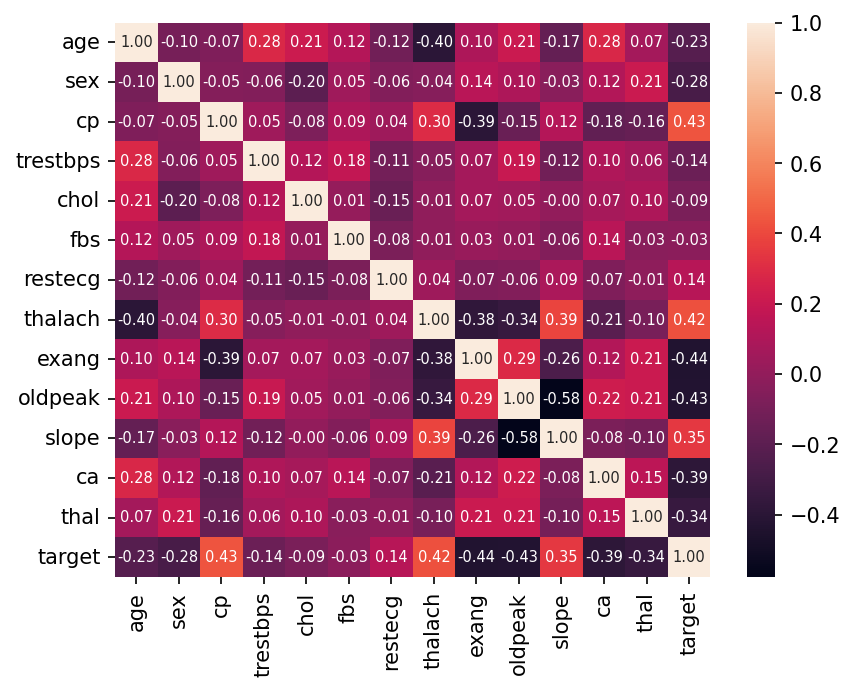

In [9]:
plt.figure(dpi=150)
sns.heatmap(df.corr(),annot=True, fmt=".2f",annot_kws={"fontsize": 7})

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
corr = df.corr()
corr_target = corr['target'].abs() # ambil nilai korelasi absolut terhadap kolom target
high_corr_cols = corr_target[corr_target > 0.5].index.tolist() # filter kolom dengan korelasi absolut di atas 0.7
high_corr_cols.remove('target')  # Menghapus kolom "target" dari daftar high_corr_cols
high_corr_cols

[]

Tidak ada kolom lain yang memiliki korelasi diatas 0.5, artinya tidak ada kolom/fitur yang benar benar mempengaruhi timbulnya penyakit jantung dengan kuat

### Mengubah isi dari beberapa kolom untuk memudahkan dalam membaca data

In [12]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [13]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [14]:
df['sex'] = df['sex'].replace({0: 'perempuan', 1: 'pria'})
df['thal'] = df['thal'].replace({0:'normal', 1:'cacat', 2:'dapat disembuhkan',3:'tidak diketahui'})
df.rename(columns={'target':'disease'},inplace=True)
df['disease'].replace({0:'tidak',1:'ya'},inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63,pria,3,145,233,1,0,150,0,2.3,0,0,cacat,ya
1,37,pria,2,130,250,0,1,187,0,3.5,0,0,dapat disembuhkan,ya
2,41,perempuan,1,130,204,0,0,172,0,1.4,2,0,dapat disembuhkan,ya
3,56,pria,1,120,236,0,1,178,0,0.8,2,0,dapat disembuhkan,ya
4,57,perempuan,0,120,354,0,1,163,1,0.6,2,0,dapat disembuhkan,ya


Analisis sebaran pengidap penyakit jantung berdasarkan umur

In [15]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease'],
      dtype='object')

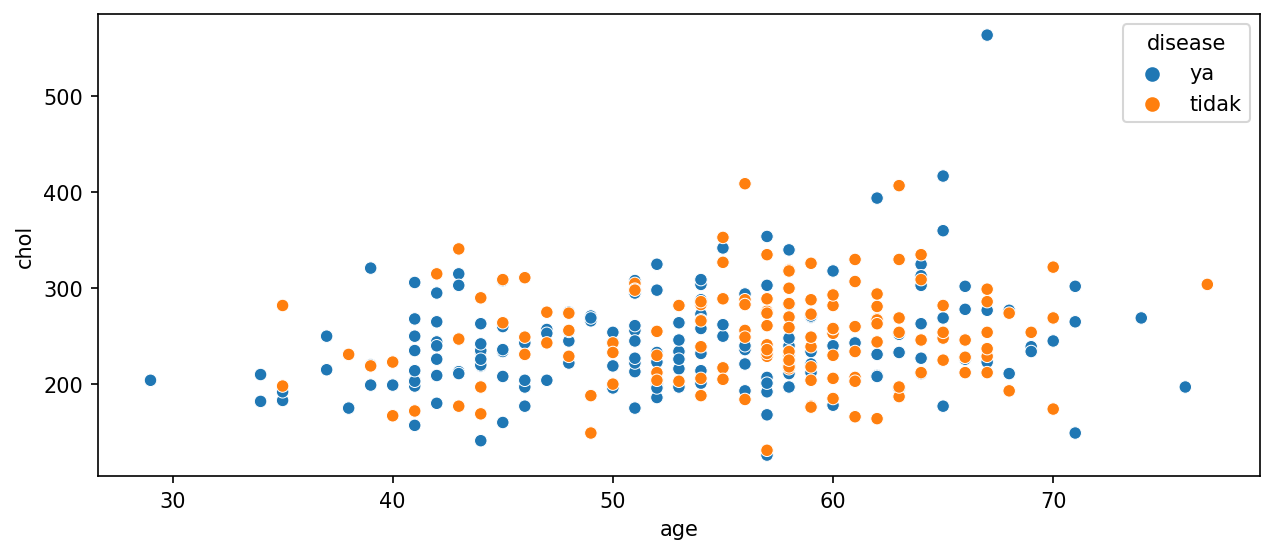

In [16]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,x='age',y='chol',hue='disease');

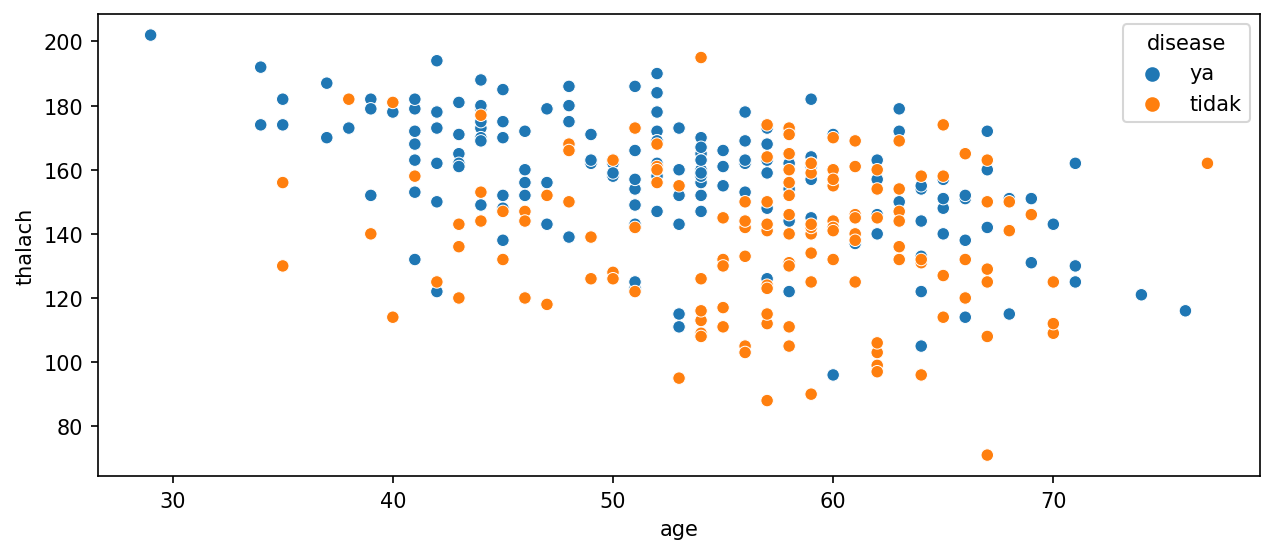

In [17]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(x=df['age'],y=df['thalach'],hue=df['disease']);

<Axes: xlabel='age', ylabel='Density'>

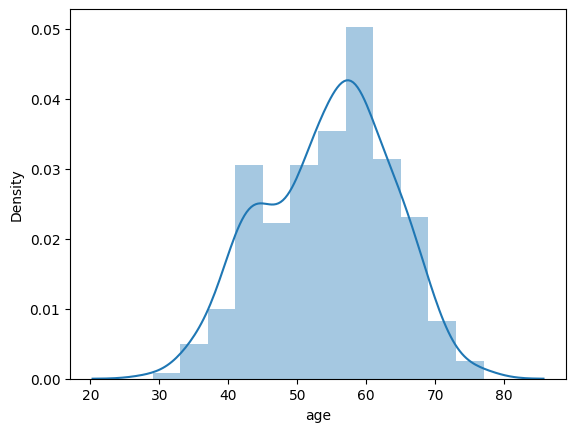

In [18]:
plt.figure(dpi=100)
sns.distplot(df['age'])

<Axes: xlabel='age', ylabel='count'>

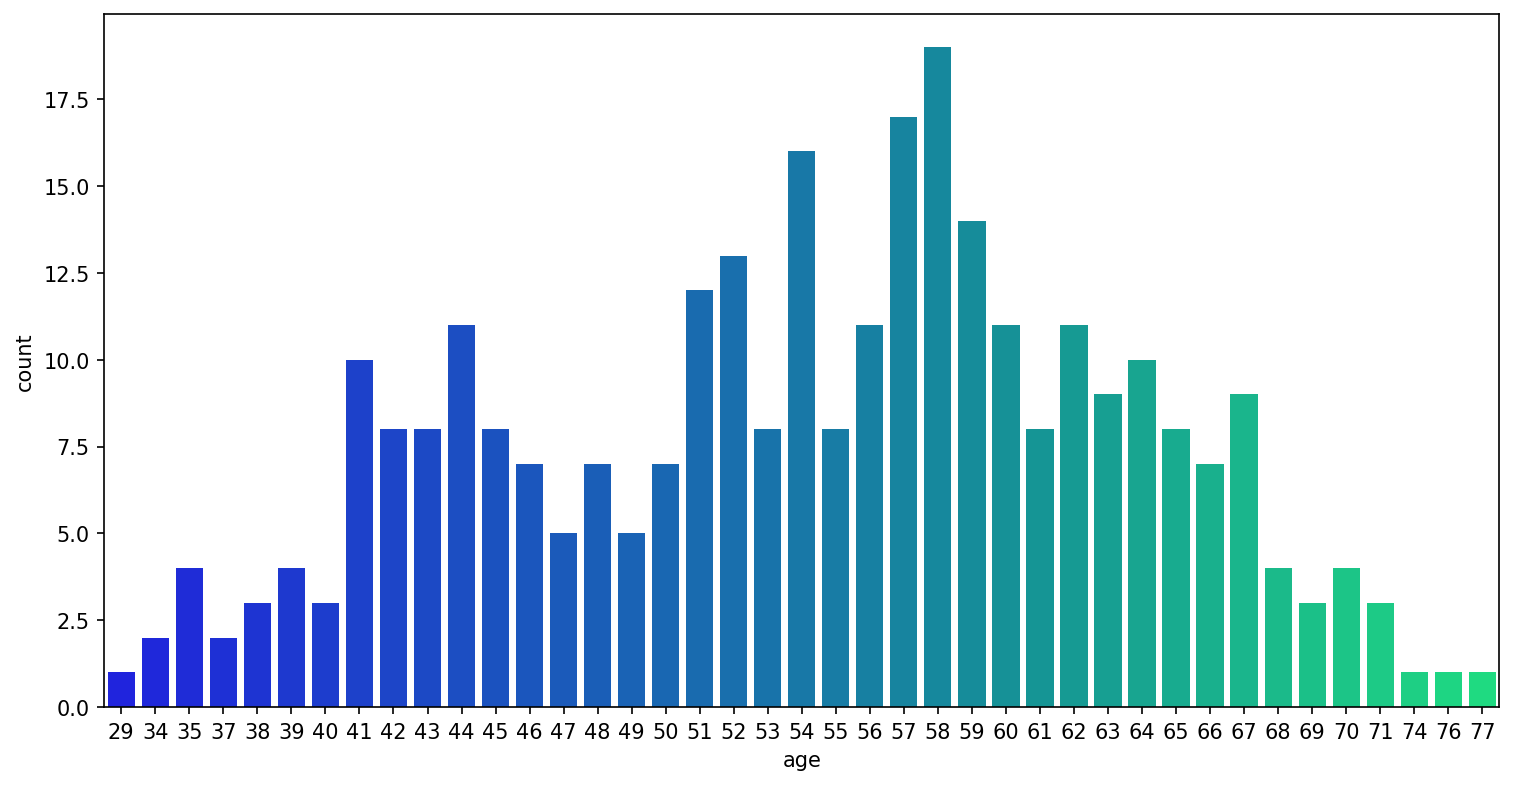

In [19]:
fig,ax = plt.subplots(figsize=(12,6),dpi=150)
sns.countplot(x=df['age'],palette='winter')

<Axes: xlabel='age', ylabel='count'>

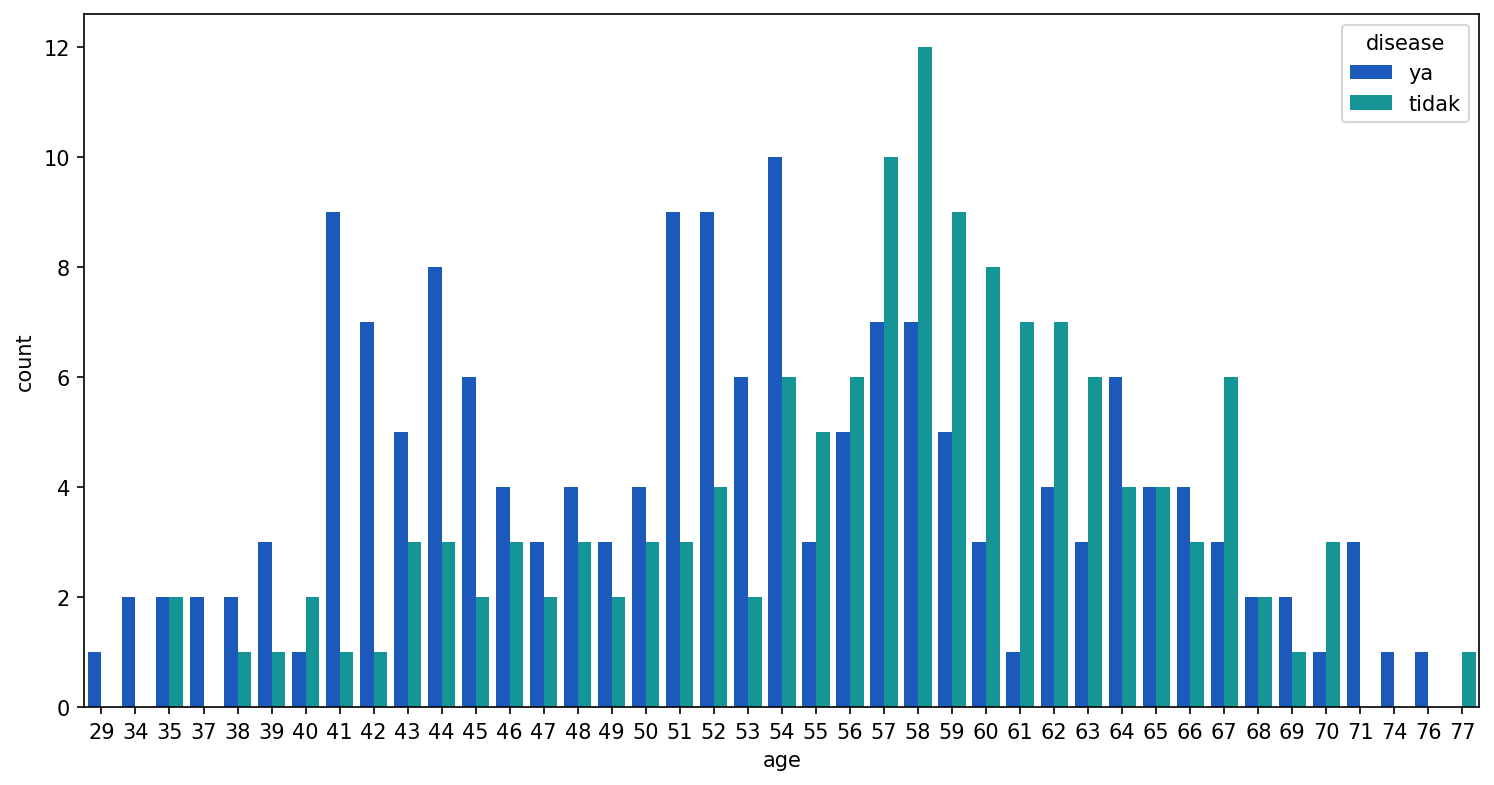

In [20]:
fig,ax = plt.subplots(figsize=(12,6),dpi=150)
sns.countplot(x=df['age'],hue=df['disease'],palette='winter')

**Sebaran umur pengidap penyakit jantung sangatlah luas bahkan dimulai dari umur 29 tahun pun dapat mengidap penyakit ini**

In [21]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease'],
      dtype='object')

analisis pengidap penyakit jantung berdasarkan kolestrol level

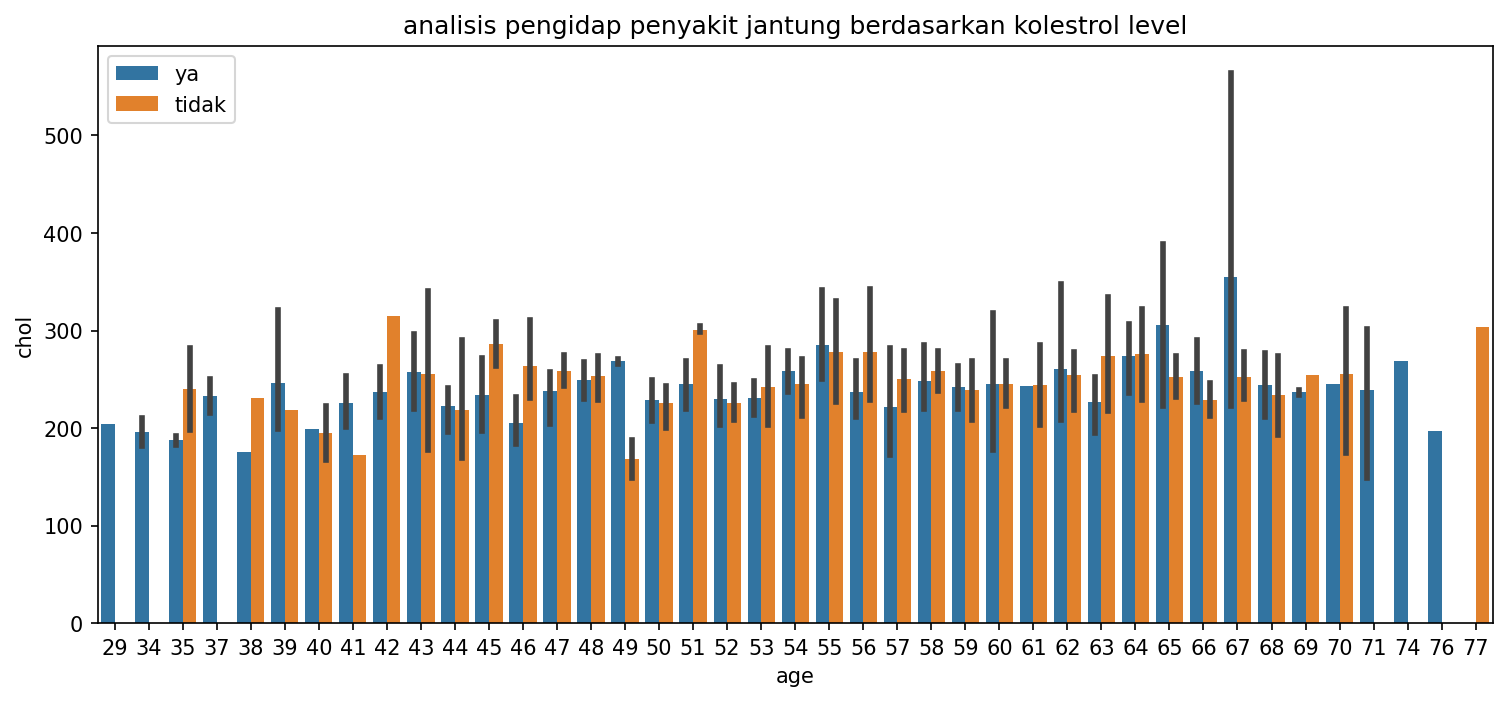

In [22]:
fig,ax = plt.subplots(figsize=(12,5),dpi=150)

sns.barplot(x=df['age'],y=df['chol'],hue=df['disease'])
ax.set(title='analisis pengidap penyakit jantung berdasarkan kolestrol level')
ax.legend(loc='upper left');

Melihat persebaran umur dan level kolestrol berdasarkan gender dan jenis detak jantung (normal, cacat, cacat dapat disembuhkan, dan tidak diketahui)

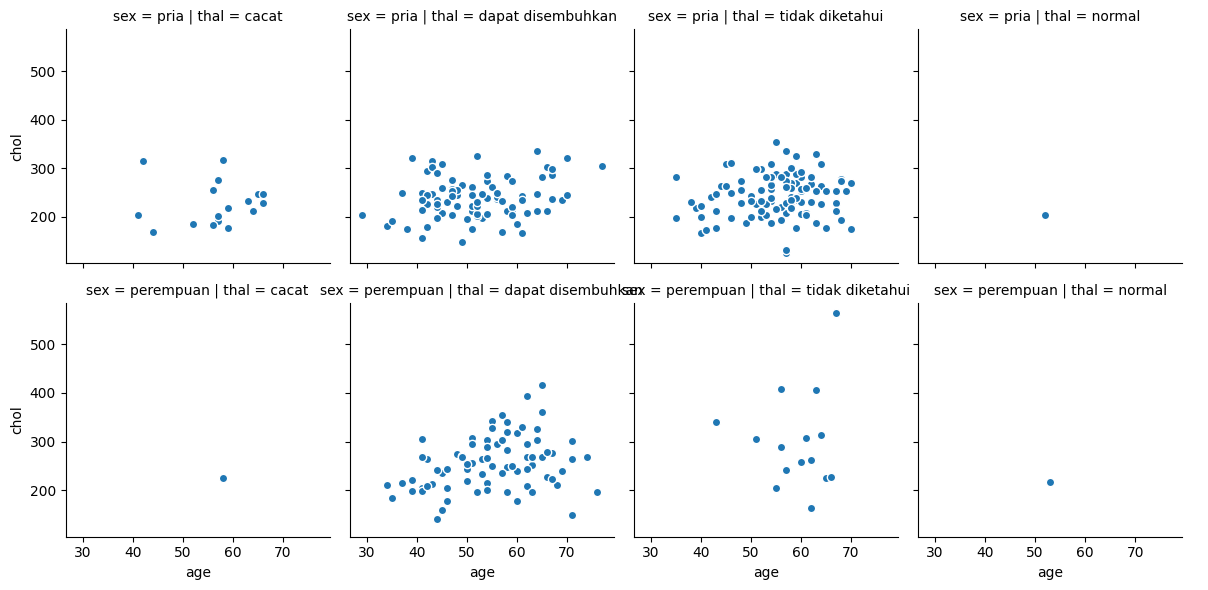

In [23]:
g = sns.FacetGrid(data=df,col='thal',row='sex')
g = g.map(plt.scatter, "age", "chol", edgecolor="w")
g.add_legend()

analisis pengidap penyakit jantung berdasarkan maximum heart rate (detakan jantung)

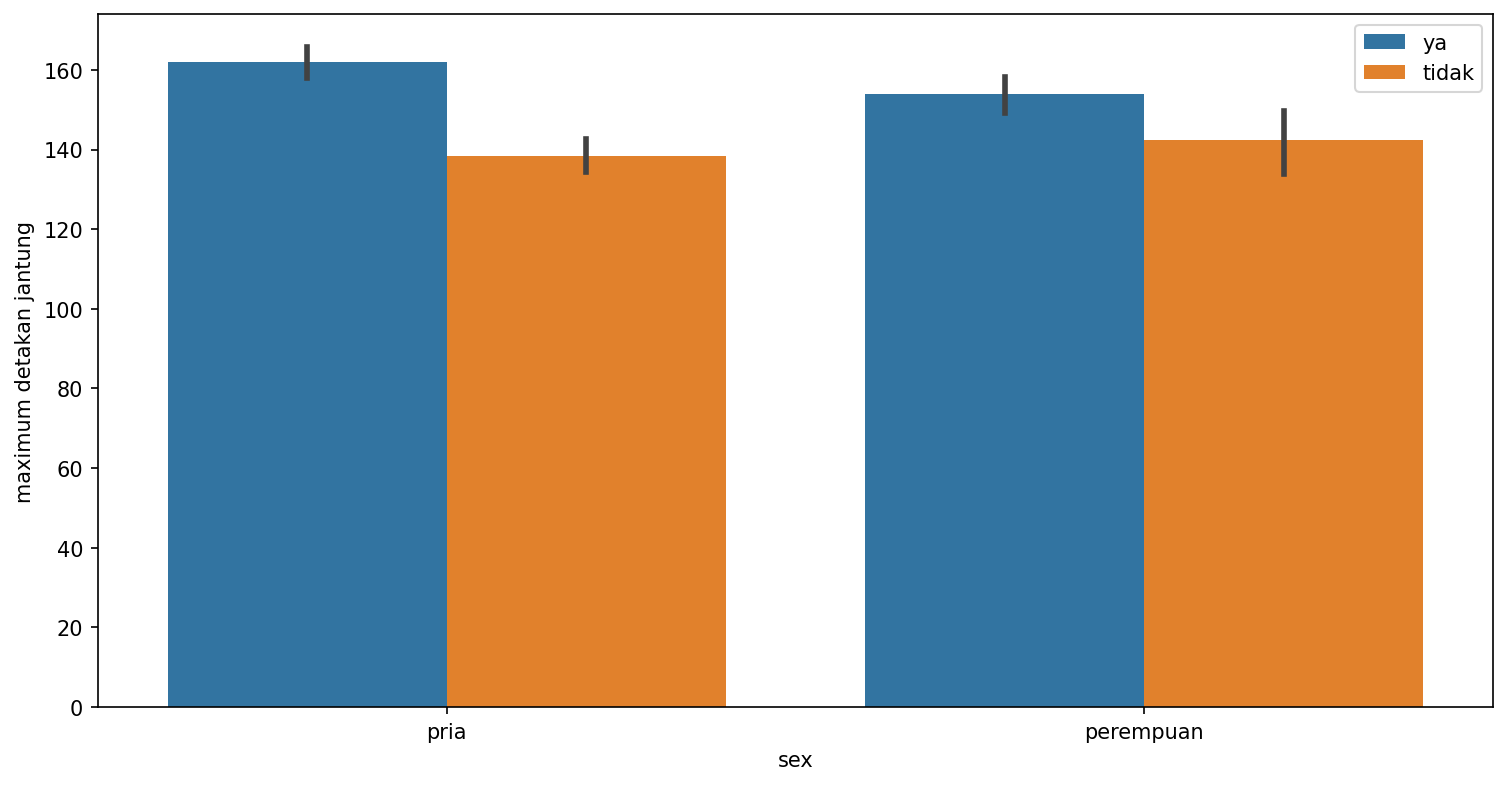

In [24]:
fig,ax = plt.subplots(figsize=(12,6),dpi=150)

sns.barplot(x=df['sex'],y=df['thalach'],hue=df['disease'])
ax.set(ylabel='maximum detakan jantung')

ax.legend(loc='upper right');

**tidak terdapat perbedaan maximum detakan jantung yang signifikan diantara pria dan perempuan normal, namun dapat terlihat bahwa penderita penyakit jantung memiliki maximum detakan jantung yang sedikit lebih banyak**

**Menurut data, detak jantung orang normal berkisaran diantara 60-100 kali dalam satu menit**

Melihat data 10 teratas yang memiliki maximum detak jantung terbanyak dalam satu menit

In [25]:
df.nlargest(10,'thalach')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
72,29,pria,1,130,204,0,0,202,0,0.0,2,0,dapat disembuhkan,ya
248,54,pria,1,192,283,0,0,195,0,0.0,2,1,tidak diketahui,tidak
103,42,pria,2,120,240,1,1,194,0,0.8,0,0,tidak diketahui,ya
125,34,perempuan,1,118,210,0,1,192,0,0.7,2,0,dapat disembuhkan,ya
62,52,pria,3,118,186,0,0,190,0,0.0,1,0,cacat,ya
32,44,pria,1,130,219,0,0,188,0,0.0,2,0,dapat disembuhkan,ya
1,37,pria,2,130,250,0,1,187,0,3.5,0,0,dapat disembuhkan,ya
56,48,pria,0,122,222,0,0,186,0,0.0,2,0,dapat disembuhkan,ya
73,51,pria,0,140,261,0,0,186,1,0.0,2,0,dapat disembuhkan,ya
57,45,pria,0,115,260,0,0,185,0,0.0,2,0,dapat disembuhkan,ya


**terdapat seseorang yang memiliki detak jantung sangat tinggi namun tidak mengidap penyakit jantung**

Melihat data 10 teratas yang memiliki maximum detak jantung paling sedikit dalam satu menit

In [26]:
df.nsmallest(10,'thalach')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
272,67,pria,0,120,237,0,1,71,0,1.0,1,0,dapat disembuhkan,tidak
243,57,pria,0,152,274,0,1,88,1,1.2,1,1,tidak diketahui,tidak
297,59,pria,0,164,176,1,0,90,0,1.0,1,2,cacat,tidak
262,53,pria,0,123,282,0,1,95,1,2.0,1,2,tidak diketahui,tidak
136,60,perempuan,2,120,178,1,1,96,0,0.0,2,0,dapat disembuhkan,ya
233,64,pria,0,120,246,0,0,96,1,2.2,0,1,dapat disembuhkan,tidak
216,62,perempuan,2,130,263,0,1,97,0,1.2,1,1,tidak diketahui,tidak
198,62,pria,0,120,267,0,1,99,1,1.8,1,2,tidak diketahui,tidak
226,62,pria,1,120,281,0,0,103,0,1.4,1,1,tidak diketahui,tidak
269,56,pria,0,130,283,1,0,103,1,1.6,0,0,tidak diketahui,tidak


**sebaliknya terdapat seseorang yang memiliki detak jantung normal namun mengidap penyakit jantung**

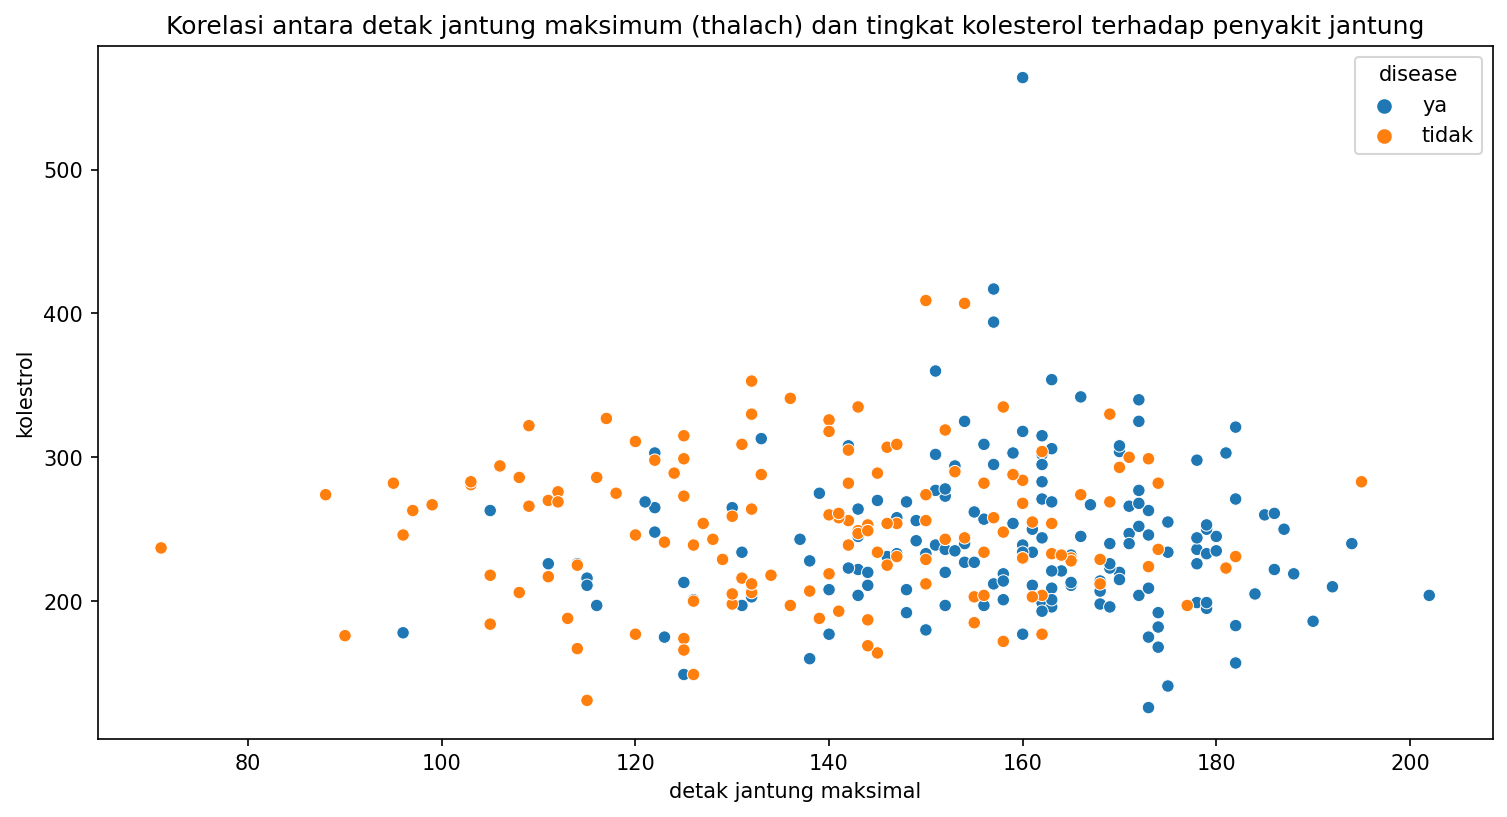

In [27]:
fig,ax = plt.subplots(figsize=(12,6),dpi=150)

ax = sns.scatterplot(data=df,x='thalach',y='chol',hue='disease',cmap='Set2')

ax.set(xlabel='detak jantung maksimal', ylabel='kolestrol',title='Korelasi antara detak jantung maksimum (thalach) dan tingkat kolesterol terhadap penyakit jantung');

In [28]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease'],
      dtype='object')

Analisis keterkaitan nyeri dada terhadap pengidap penyakit jantung
`cp`: jenis nyeri dada (4 nilai):
   * Nilai 1: angina tipikal
   * Nilai 2: angina atipikal
   * Nilai 3: nyeri non-anginal
   * Nilai 4: tanpa gejala

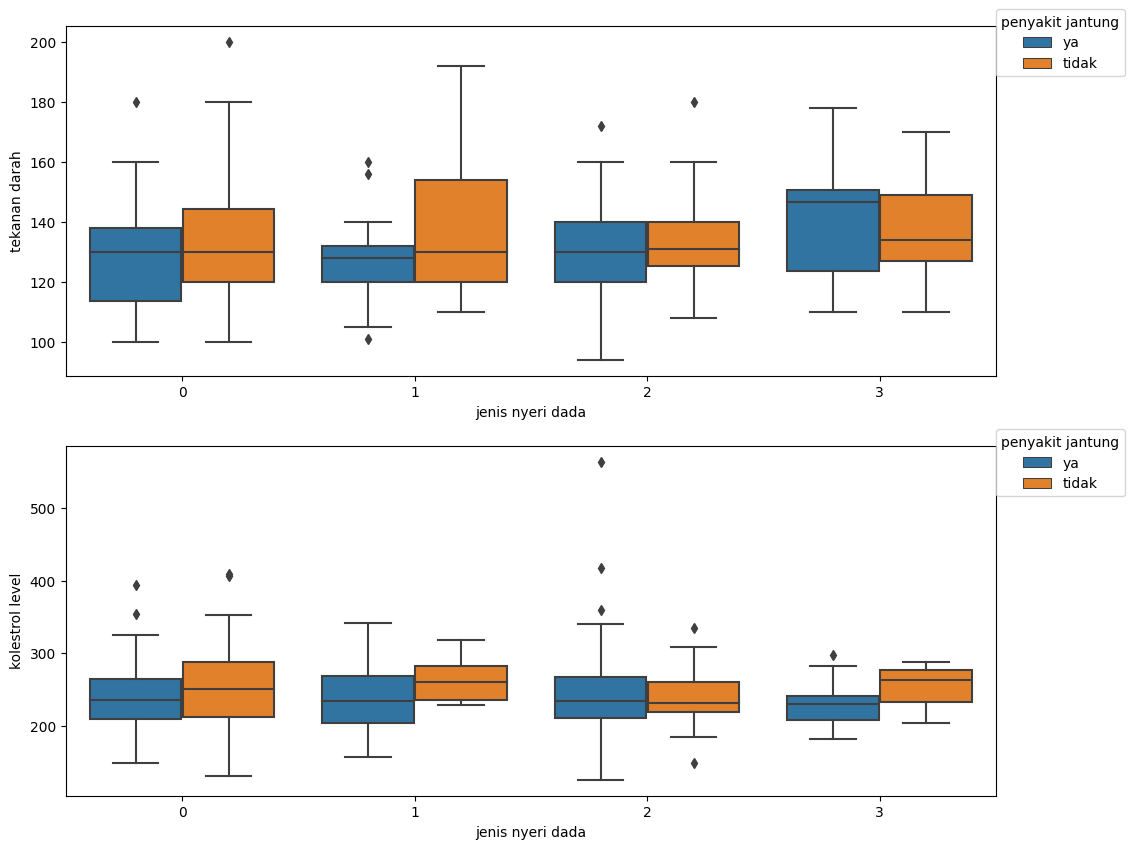

In [29]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,10))
sns.boxplot(ax=ax1,x='cp',y='trestbps',data=df,hue='disease')
ax1.set(xlabel='jenis nyeri dada',ylabel='tekanan darah')

ax1.legend(title='penyakit jantung',loc=(1,.855))

sns.boxplot(ax=ax2,x='cp',y='chol',data=df,hue='disease')
ax2.set(xlabel='jenis nyeri dada',ylabel='kolestrol level')

ax2.legend(title='penyakit jantung',loc=(1,.855))

**Dari gambar diatas dapat terlihat bahwa jenis nyeri dada tidak mempengaruhi adanya penyakit jantung, hal ini dikarenakan tidak terdapat perbedaan yang signifikan dari jenis nyeri dada yang satu dan yang lainnya terhadap penyakit jantung**

**Analisis keterkaitan gula darah terhadap penyakit jantung**

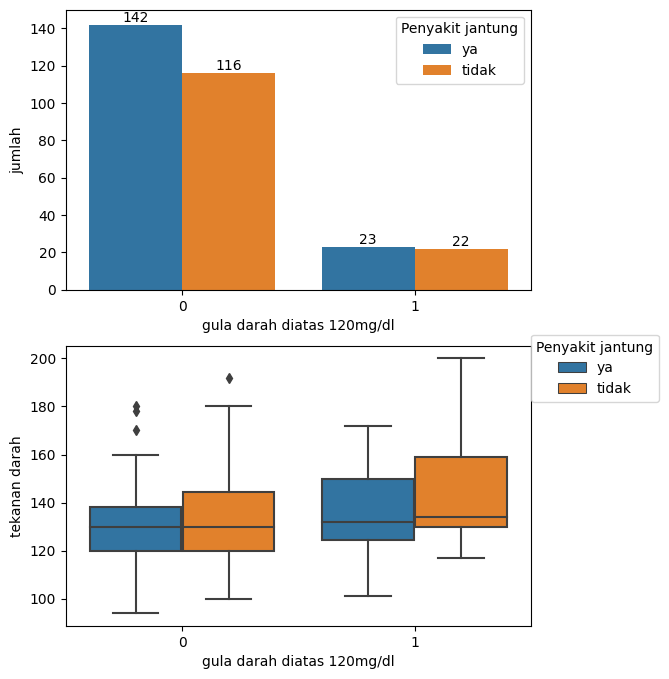

In [30]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(6,8))
sns.countplot(ax=ax1,x=df['fbs'],hue=df['disease'])
for conten in ax1.containers:
    ax1.bar_label(conten)
ax1.set(ylim=(0,150),xlabel='gula darah diatas 120mg/dl',ylabel='jumlah')
ax1.legend(title='Penyakit jantung')

sns.boxplot(x=df['fbs'],y=df['trestbps'],hue=df['disease'],ax=ax2)
ax2.set(xlabel='gula darah diatas 120mg/dl',ylabel='tekanan darah')
ax2.legend(loc=(1,.8),title='Penyakit jantung')

**Berdasarkan hasil analisis, gula darah diatas 120mg/dl  tidak mempengaruhi adanya penyakit jantung, dapat dilihat bahwa lebih banyak pasien penyakit jantung yang kadar gula darahnya dibawah 120mg/dl**

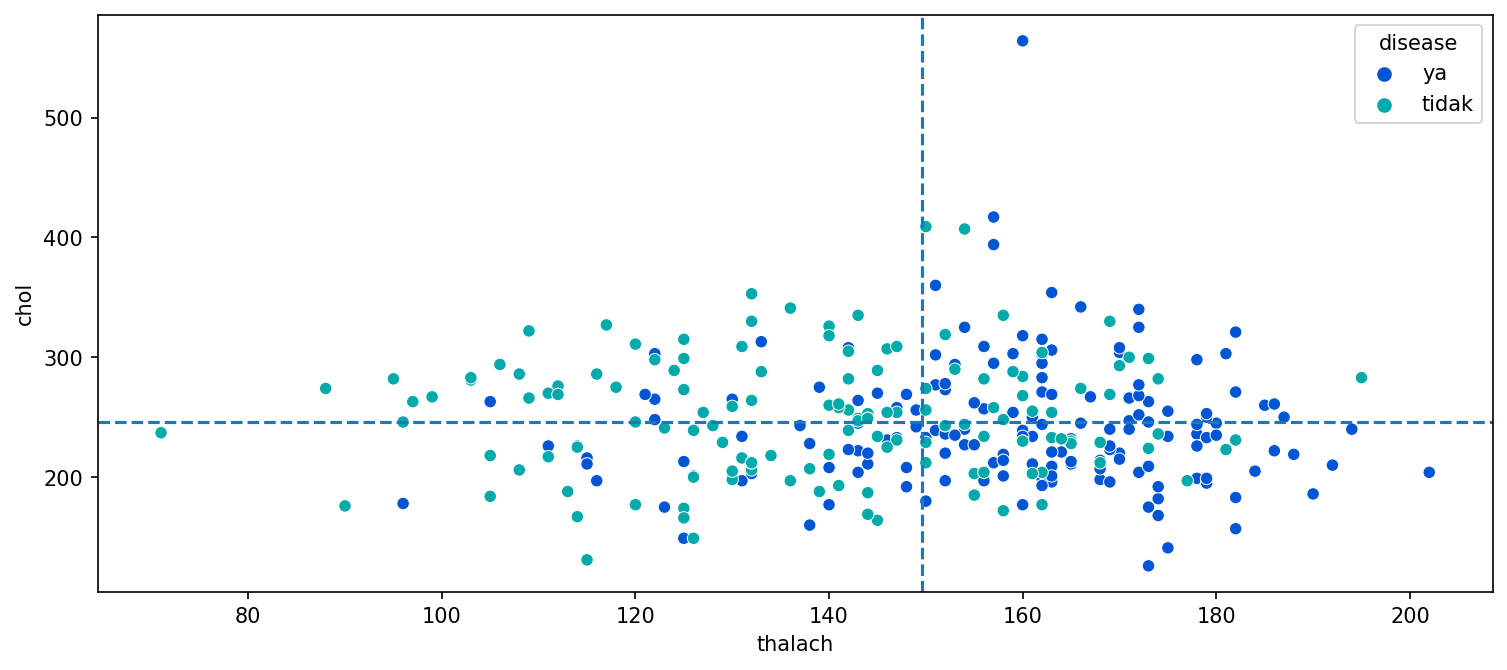

In [31]:
fig,ax=plt.subplots(figsize=(12,5),dpi=150)

sns.scatterplot(data=df,x='thalach',y='chol',hue='disease',palette='winter')
ax.axhline(df['chol'].mean(),ls='--');
ax.axvline(df['thalach'].mean(),ls='--');

## Kesimpulan
Berdasarkan analisis sejauh ini, fitur yang memiliki peran cukup tinggi terhadap adanya penyakit jantung adalah kadar level kolestrol dan maximum detak jantung, semakin tinggi kadar kolestrol dan semakin tinggi maximum detak jantung patient, maka akan semakin berpotensi mengidap penyakit jantung

## Analisis pengidap penyakit jantung pada pasien yang berumur diatas 50 tahun

In [32]:
over_50=df[df['age']>50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63,pria,3,145,233,1,0,150,0,2.3,0,0,cacat,ya
3,56,pria,1,120,236,0,1,178,0,0.8,2,0,dapat disembuhkan,ya
4,57,perempuan,0,120,354,0,1,163,1,0.6,2,0,dapat disembuhkan,ya
5,57,pria,0,140,192,0,1,148,0,0.4,1,0,cacat,ya
6,56,perempuan,1,140,294,0,0,153,0,1.3,1,0,dapat disembuhkan,ya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,pria,0,164,176,1,0,90,0,1.0,1,2,cacat,tidak
298,57,perempuan,0,140,241,0,1,123,1,0.2,1,0,tidak diketahui,tidak
300,68,pria,0,144,193,1,1,141,0,3.4,1,2,tidak diketahui,tidak
301,57,pria,0,130,131,0,1,115,1,1.2,1,1,tidak diketahui,tidak


### Melihat sebaran max heart rate terhadap penyakit jantung pada pasien diatas 50 tahun

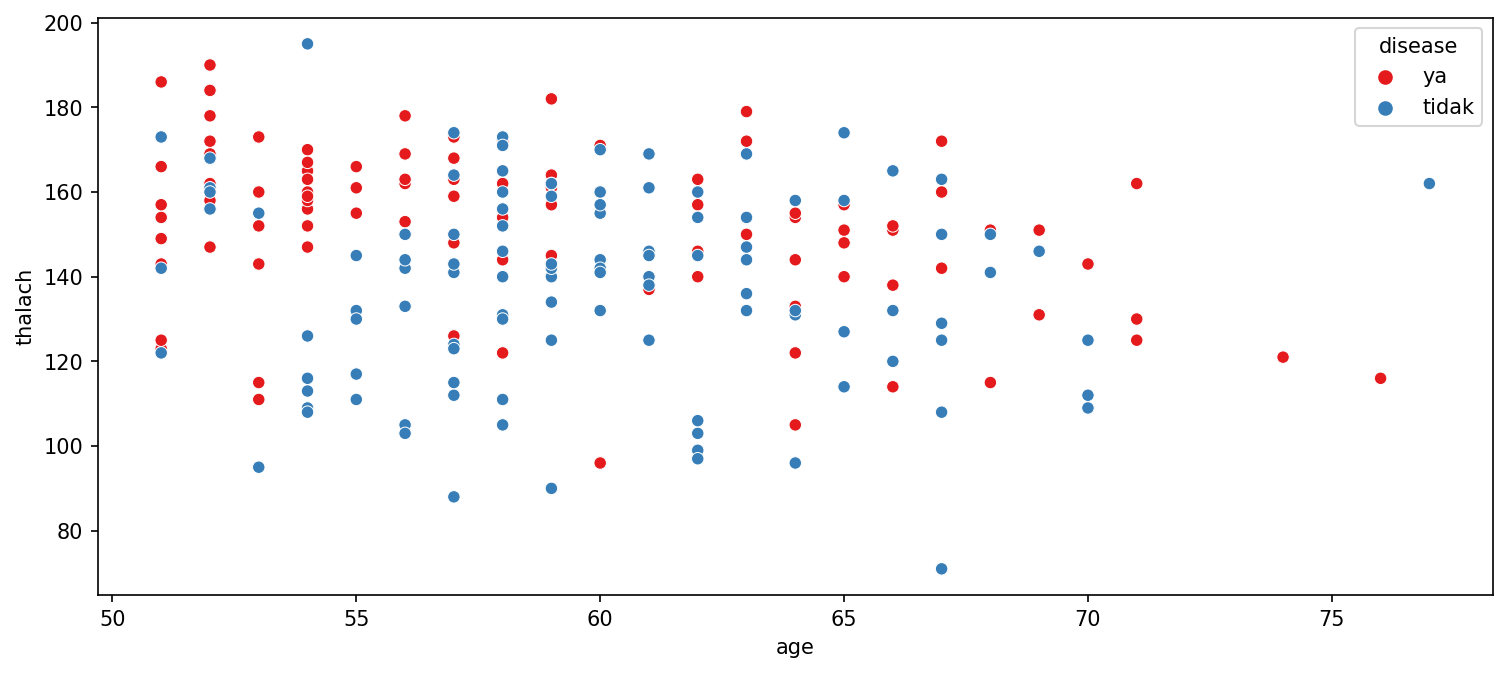

In [33]:
fig,ax=plt.subplots(figsize=(12,5),dpi=150)

sns.scatterplot(data=over_50,ax=ax,x='age',y='thalach',hue='disease',palette='Set1');

### Visualisasi data yang mempengaruhi penyakit jantung pada pasien berusia diatas 50 tahun

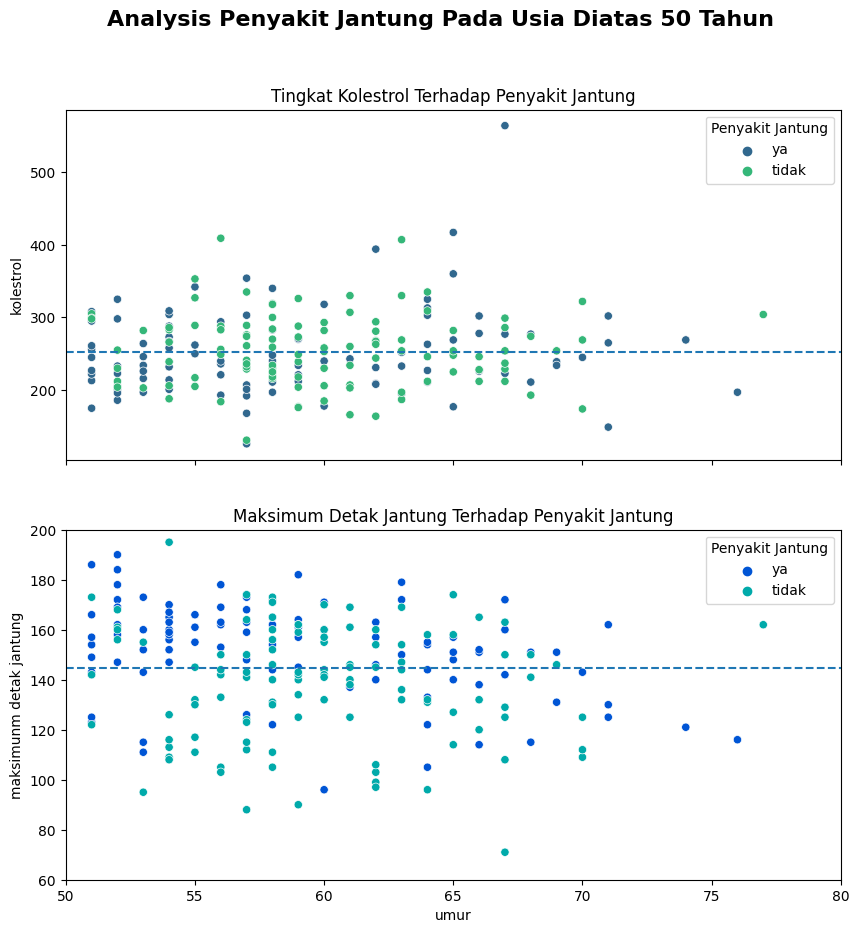

In [34]:
fig,(ax1,ax2)=plt.subplots(figsize=(10,10),dpi=100,nrows=2,ncols=1,sharex=True)

# Visualisasi hubungan antara umur dengan kolestrol level terhadap penyakit jantung,
# serta melihat rata-rata kolestrol level pasien pada data

# plot ax1
sns.scatterplot(ax=ax1,x=over_50['age'],y=over_50['chol'],hue=over_50['disease'],palette='viridis')
ax1.axhline(over_50['chol'].mean(),ls='--')

# customize ax1
ax1.set(xlim=(50,80),ylabel='kolestrol',title='Tingkat Kolestrol Terhadap Penyakit Jantung')
ax1.legend(title='Penyakit Jantung')

# Visualisasi hubungan antara umur dengan max detak jantung terhadap penyakit jantung,
# serta melihat rata-rata detak jantung pasien pada data

# plot ax2
sns.scatterplot(ax=ax2,x=over_50['age'],y=over_50['thalach'],hue=over_50['disease'],palette='winter')
ax2.axhline(over_50['thalach'].mean(),ls='--')

# customize ax2
ax2.set(ylabel='maksimunm detak jantung',ylim=(60,200),xlabel='umur',title='Maksimum Detak Jantung Terhadap Penyakit Jantung')
ax2.legend(title='Penyakit Jantung')

# beri judul pada figure dan save figure ke local
fig.suptitle("Analysis Penyakit Jantung Pada Usia Diatas 50 Tahun",fontsize=16,fontweight='bold');
plt.savefig('Analysis_Penyakit_Jantung_Pada_Usia_Diatas_50_Tahun.png')

### Membuat prediksi menggunakan machine learning

In [35]:
df=pd.read_csv('heart-disease.csv')

In [122]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Melihat keseimbangan persebaran target pada dataset
[Apa itu Imbalanced Dataset](https://socs.binus.ac.id/2019/12/26/imbalanced-dataset/)

Dataset yang tidak seimbang (imbalanced dataset) merujuk pada situasi di mana jumlah sampel dalam set data tidak didistribusikan secara merata di antara kelas-kelas yang ada. Dalam konteks klasifikasi, biasanya terdapat satu atau beberapa kelas minoritas yang memiliki jumlah sampel yang jauh lebih sedikit daripada kelas mayoritas.

Sebagai contoh, misalkan Anda memiliki dataset yang berisi informasi tentang deteksi penyakit langka. Jika penyakit tersebut langka, kemungkinan besar jumlah sampel pasien yang positif (kelas minoritas) akan jauh lebih sedikit daripada jumlah sampel pasien yang negatif (kelas mayoritas).

Imbalanced dataset dapat menyebabkan masalah saat melatih model machine learning. Beberapa masalah yang muncul antara lain:

Bias: Model cenderung condong ke kelas mayoritas dan memiliki kinerja yang buruk dalam mengidentifikasi kelas minoritas. Hal ini dapat terjadi karena model cenderung memprediksi kelas mayoritas secara konstan.

Performa yang Tidak Akurat: Ketika menggunakan metrik evaluasi standar seperti akurasi (accuracy), performa model dapat menyesatkan. Misalnya, jika 90% sampel dalam dataset adalah kelas mayoritas dan model memprediksi seluruhnya sebagai kelas mayoritas, maka model akan memiliki akurasi 90% meskipun tidak dapat mengenali kelas minoritas dengan baik.

Overfitting: Dalam beberapa kasus, model dapat cenderung overfit pada kelas mayoritas karena perbedaan jumlah sampel yang signifikan antara kelas mayoritas dan minoritas. Ini dapat mengakibatkan model yang tidak dapat umum atau tidak dapat digeneralisasikan dengan baik untuk kasus-kasus baru.

Untuk mengatasi masalah ini, beberapa strategi yang dapat diterapkan adalah:

Oversampling: Memperbanyak sampel dari kelas minoritas untuk menyamakan jumlah sampel dengan kelas mayoritas.
Undersampling: Mengurangi jumlah sampel dari kelas mayoritas agar seimbang dengan kelas minoritas.
Penggunaan metrik evaluasi yang tepat: Selain akurasi, menggunakan metrik evaluasi lain seperti presisi (precision), recall, atau F1-score yang lebih cocok untuk kasus dengan dataset yang tidak seimbang.
Penggunaan algoritma klasifikasi yang tahan terhadap ketidakseimbangan, seperti Random Forest, Gradient Boosting, atau algoritma yang menggunakan pendekatan cost-sensitive learning.

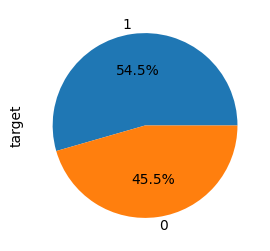

In [36]:
plt.figure(figsize=(4,3))
df['target'].value_counts().plot.pie(autopct='%.1f%%');

Persebaran target yang akan diprediksi sudah cukup seimbang.

### Mengecek outliers

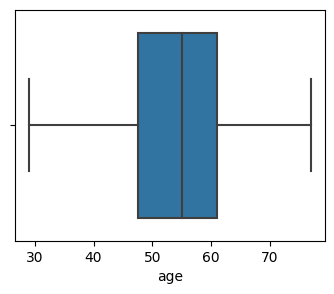

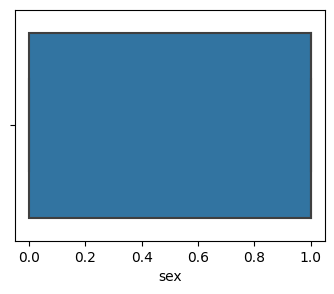

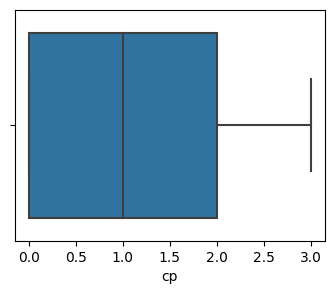

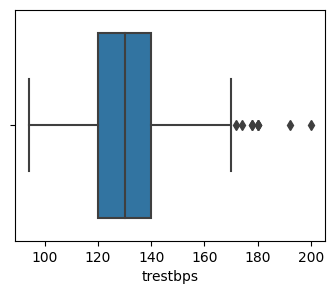

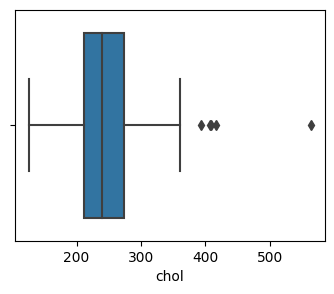

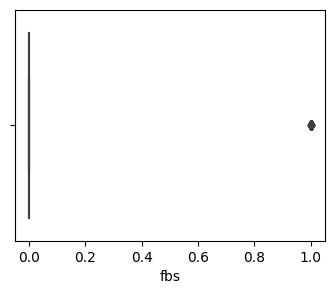

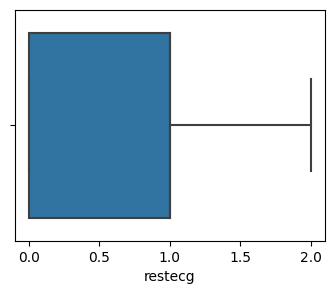

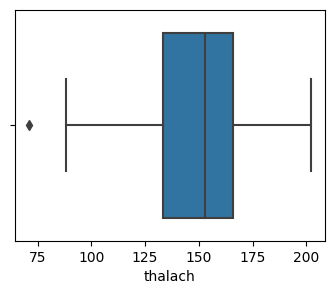

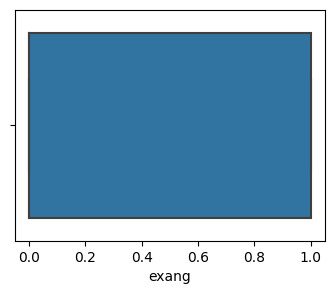

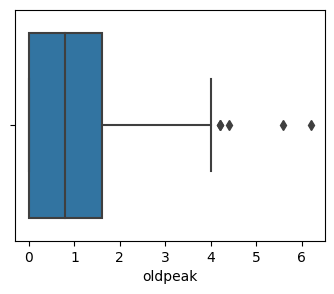

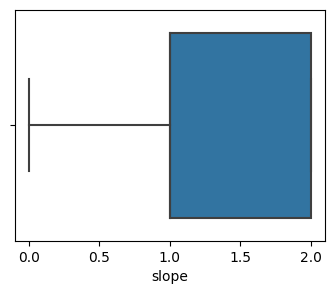

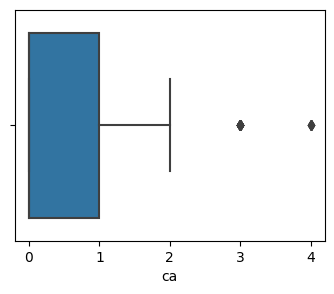

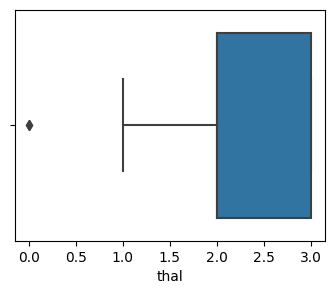

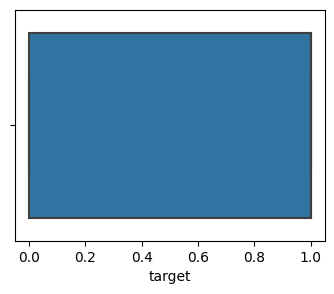

In [37]:
for i in df.columns:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=df[i])
    plt.show();

### Korelasi antar fitur

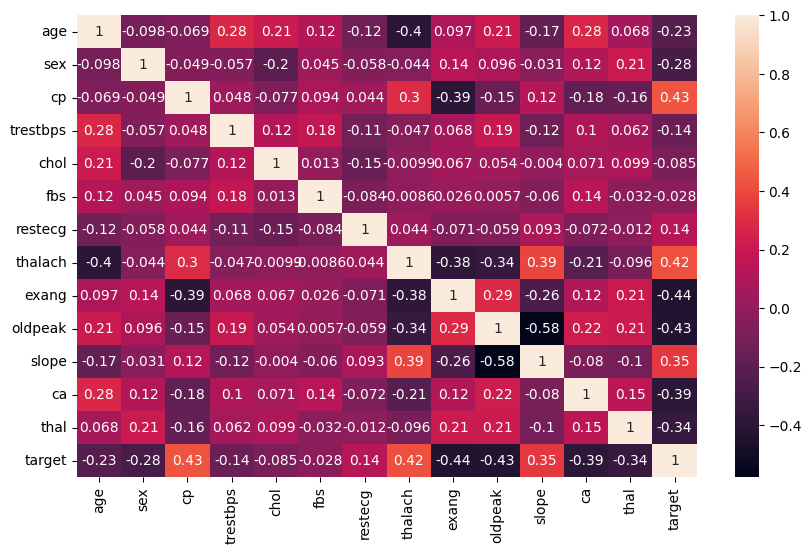

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True);

In [124]:
corr = df.corr()
corr_target = corr['target'].abs() # ambil nilai korelasi absolut terhadap kolom target
high_corr_cols = corr_target[corr_target > 0.7].index.tolist() # filter kolom dengan korelasi absolut di atas 0.7
high_corr_cols

['target']

tidak ada fitur lainnya yang memiliki korelasi lebih dari 70% terhadap `target`, artinya tidak terdapat fitur yang benar-benar mempengaruhi seseorang dalam terkena penyakit sakit jantung dengan jelas

### Split data menjadi feature dan target

In [40]:
X = df.drop('target',axis=1)
y = df['target']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
len(X), len(X_train), len(X_test)

(303, 212, 91)

### Feature Selection
Menggunakan Mutual Information (MI) dan Information Value (IV)

1. Mutual Information (MI):
* Mutual Information mengukur sejauh mana informasi dalam satu fitur memberikan wawasan tentang variabel target.
* MI menggambarkan ketergantungan atau hubungan antara fitur dan variabel target.
* Dengan menghitung MI antara setiap fitur dan variabel target, kita dapat menentukan fitur-fitur yang memiliki hubungan yang kuat dengan variabel target.
* Fitur-fitur dengan MI yang tinggi dianggap lebih penting karena mereka memberikan informasi yang berguna dalam memprediksi variabel target.
* Dengan menggunakan MI, kita dapat mengidentifikasi fitur-fitur yang memiliki hubungan yang kuat dengan variabel target dan memilihnya sebagai fitur penting untuk model.

2. Information Value (IV):
* Information Value (IV) mengukur kekuatan prediktif fitur terhadap variabel target pada dataset yang memiliki variabel target diskrit (biasanya dalam kasus klasifikasi biner).
* IV menggunakan persentase kategori dalam setiap fitur dan perbedaan antara persentase target positif dan negatif dalam setiap kategori untuk menghitung nilai IV.
* IV memberikan pemahaman tentang sejauh mana sebuah fitur memiliki kemampuan untuk membedakan antara kelas target yang berbeda.
* Fitur-fitur dengan nilai IV yang tinggi dianggap lebih penting karena mereka memiliki kekuatan prediktif yang kuat dalam memisahkan kelas target.
* Dengan menggunakan IV, kita dapat mengidentifikasi fitur-fitur yang memberikan informasi yang signifikan dan memilihnya sebagai fitur penting untuk model.
* Fitur dengan IV lebih dari 0.5 patut dicurigai, semakin tinggi nilai IV fitur terhadap target dapat diartikan bahwa semakin tinggi juga ketergantungan target terhadap fitur, dalam kasus ini fitur dengan IV diatas 1 tidak akan digunakan.

### Mutual Information (MI)

In [43]:
from sklearn.feature_selection import mutual_info_classif
# menentukan informasi mutual
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.05102283, 0.12641671, 0.        , 0.00261778,
       0.02725586, 0.01213308, 0.08214027, 0.08179099, 0.07347235,
       0.07717571, 0.13812497, 0.13904868])

In [44]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

thal        0.139049
ca          0.138125
cp          0.126417
thalach     0.082140
exang       0.081791
slope       0.077176
oldpeak     0.073472
sex         0.051023
fbs         0.027256
restecg     0.012133
chol        0.002618
age         0.000000
trestbps    0.000000
dtype: float64

In [45]:
from sklearn.feature_selection import SelectKBest
# Memilih 10 feature terbaik
sel_ten_cols = SelectKBest(mutual_info_classif, k=10)
sel_ten_cols.fit(X_train, y_train)
sel_cols = X_train.columns[sel_ten_cols.get_support()]

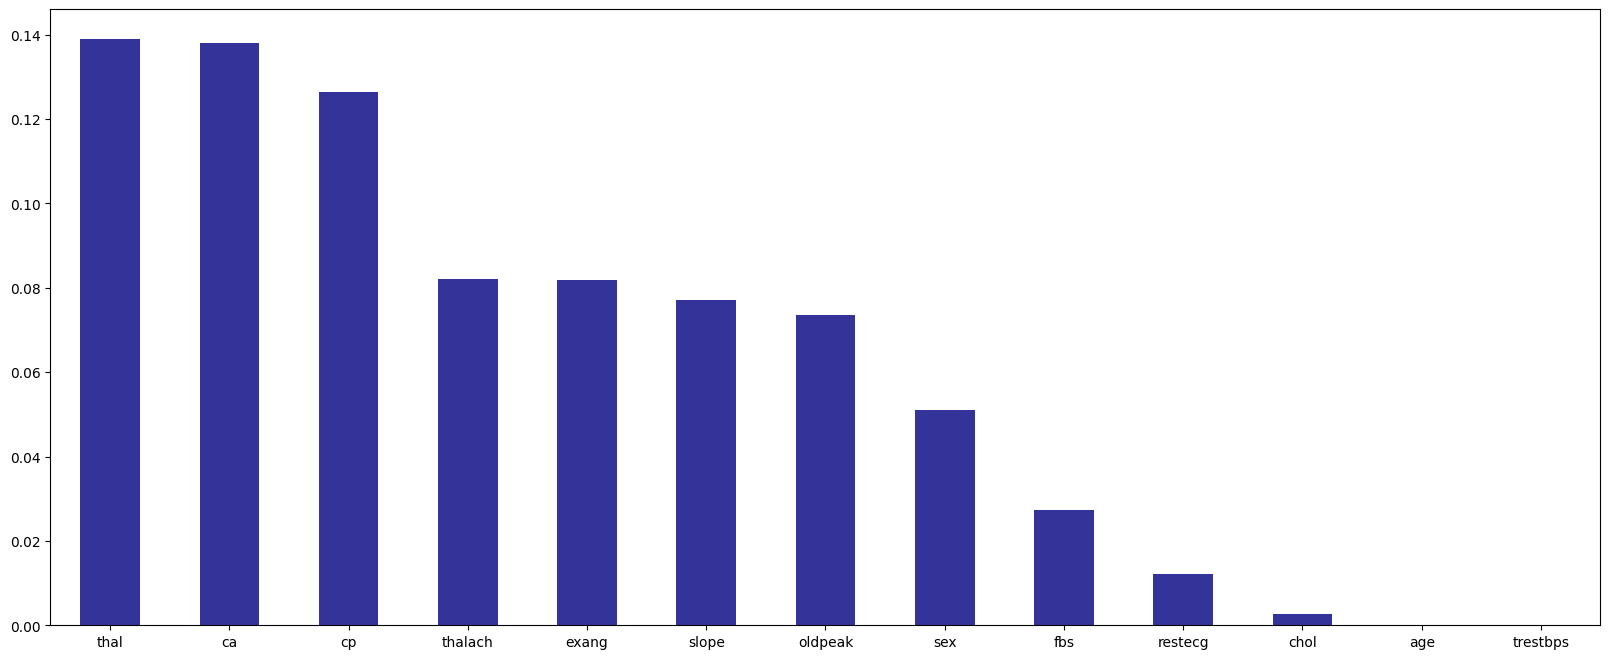

In [46]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8),cmap='terrain')
plt.xticks(rotation=0);

In [47]:
sel_cols

Index(['sex', 'cp', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')

10 fitur terbaik menurut MI adalah `sex`, `cp`, `chol`, `restecg`, `thalach`, `exang`, `oldpeak`, `slope`,
       `ca`,dan `thal`

### Information Value (IV)

In [48]:
def get_information_values(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    data_iv, data_woe = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp = pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        data_iv = pd.concat([data_iv, temp], axis=0)
        data_woe = pd.concat([data_woe, d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)

    return data_iv, data_woe    

In [49]:
iv_res, woe_res = get_information_values(df, target='target')

Information value of age is 0.451313
Information value of sex is 0.341766
Information value of cp is 1.210126
Information value of trestbps is 0.163243
Information value of chol is 0.13965
Information value of fbs is 0.00316
Information value of restecg is 0.136141
Information value of thalach is 0.894477
Information value of exang is 0.832505
Information value of oldpeak is 0.974191
Information value of slope is 0.674946
Information value of ca is 1.108452
Information value of thal is 1.261328


In [50]:
iv_res.sort_values('IV',ascending=False)

,Variable,IV
0,thal,1.261328
0,cp,1.210126
0,ca,1.108452
0,oldpeak,0.974191
0,thalach,0.894477
0,exang,0.832505
0,slope,0.674946
0,age,0.451313
0,sex,0.341766
0,trestbps,0.163243


In [51]:
iv_res[iv_res['IV']<=1]['Variable']

0         age
0         sex
0    trestbps
0        chol
0         fbs
0     restecg
0     thalach
0       exang
0     oldpeak
0       slope
Name: Variable, dtype: object

Fitur dengan nilai IV dibawah 1 adalah: `age` `sex` `trestbps` `chol` `fbs` `restecg` `thalach` `exang` `oldpeak` `slope`

### Drop fitur yang telah diseleksi
Fitur yang digunakan adalah fitur yang termasuk kedalam 10 fitur terbaik dan memiliki IV dibawah 1

In [125]:
set(X_train.columns)

{'age',
 'ca',
 'chol',
 'cp',
 'exang',
 'fbs',
 'oldpeak',
 'restecg',
 'sex',
 'slope',
 'thal',
 'thalach',
 'trestbps'}

In [126]:
set(iv_1)

{'age',
 'chol',
 'exang',
 'fbs',
 'oldpeak',
 'restecg',
 'sex',
 'slope',
 'thalach',
 'trestbps'}

In [52]:
iv_1 = iv_res[iv_res['IV']<=1]['Variable']
cols_to_drop = set(X_train.columns) - set(iv_1)
cols_to_drop

{'ca', 'cp', 'thal'}

In [53]:
sel_cols

Index(['sex', 'cp', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')

In [54]:
cols_to_keep = set(sel_cols) - cols_to_drop
cols_to_keep

{'chol', 'exang', 'oldpeak', 'restecg', 'sex', 'slope', 'thalach'}

In [55]:
X_train = X_train[cols_to_keep]
X_test = X_test[cols_to_keep]

In [56]:
X_train

,exang,restecg,chol,oldpeak,thalach,sex,slope
124,0,1,199,0.0,179,0,2
72,0,0,204,0.0,202,1,2
15,0,1,219,1.6,158,0,1
10,0,1,239,1.2,160,1,2
163,0,1,175,0.0,173,1,2
...,...,...,...,...,...,...,...
188,0,1,233,0.6,163,1,1
71,1,1,227,0.0,154,1,2
106,0,0,234,0.1,131,1,1
270,0,0,249,0.8,144,1,2


### Modelling

In [57]:
# naive bayes
nb = GaussianNB()

# KNN
knn = KNeighborsClassifier()

# Random Forest
rf = RandomForestClassifier()

# xgboost
xgb = XGBClassifier()

### Naive Bayes

              precision    recall  f1-score   support

           0       0.72      0.83      0.77        41
           1       0.84      0.74      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



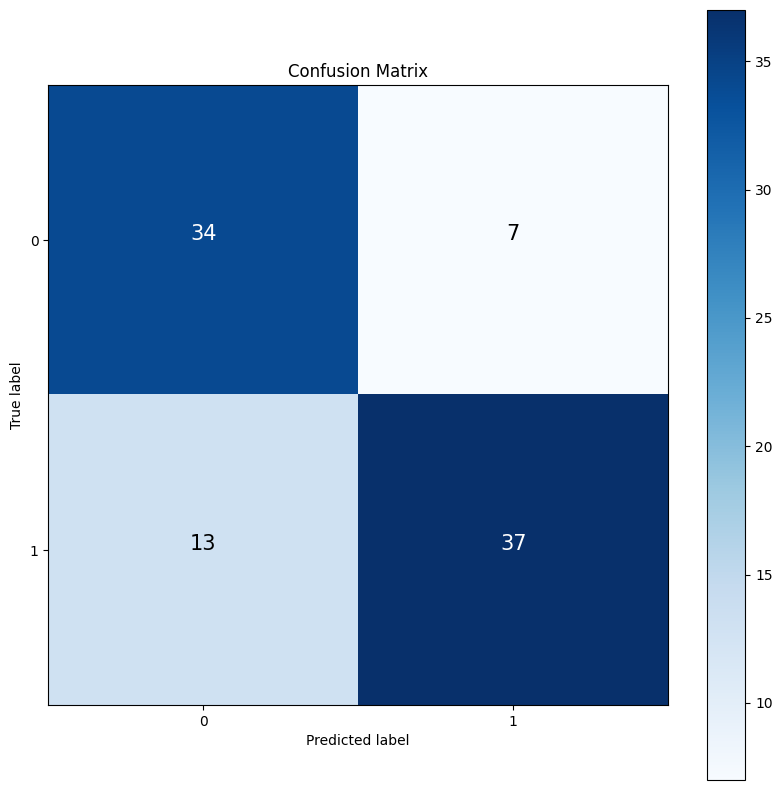

In [58]:
nb_ress,nb_name = clasification_result(nb,'Naive Bayes',X_train,X_test,y_train,y_test)

### KNN

              precision    recall  f1-score   support

           0       0.65      0.63      0.64        41
           1       0.71      0.72      0.71        50

    accuracy                           0.68        91
   macro avg       0.68      0.68      0.68        91
weighted avg       0.68      0.68      0.68        91



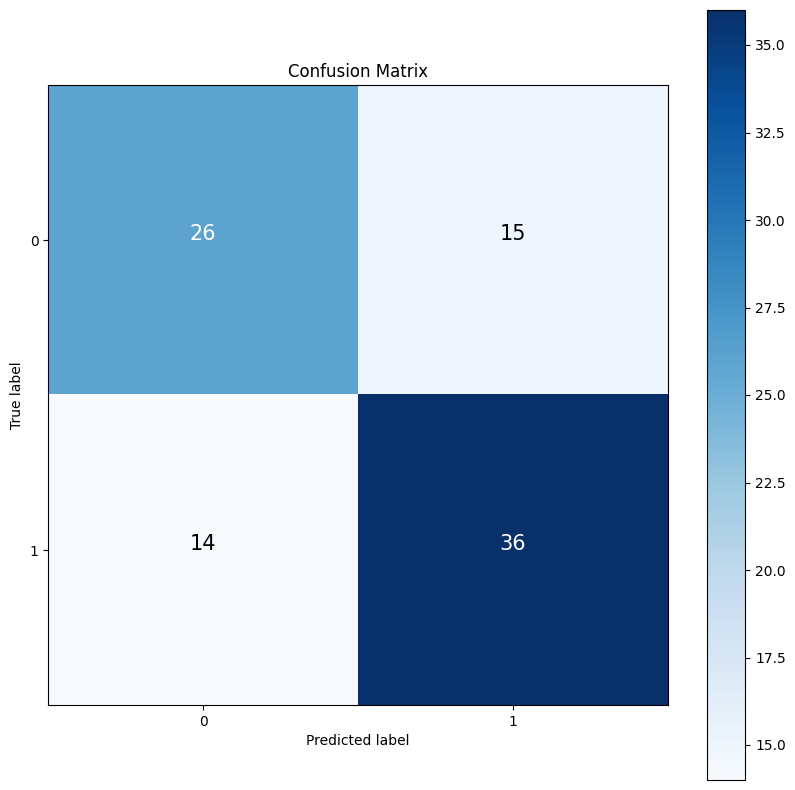

In [59]:
knn_ress, knn_name =clasification_result(knn,'K-Nearest Neighbor',X_train,X_test,y_train,y_test)

### Random Forest

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.85      0.82      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



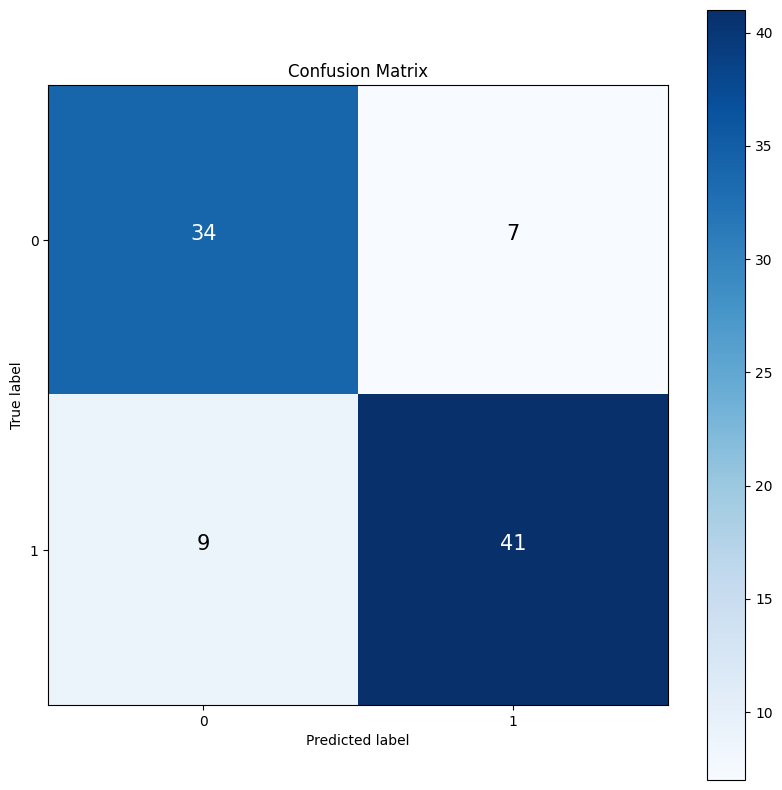

In [60]:
rf_ress, rf_name = clasification_result(rf,'Random Forest',X_train,X_test,y_train,y_test)

### XGBOOST

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        41
           1       0.78      0.78      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



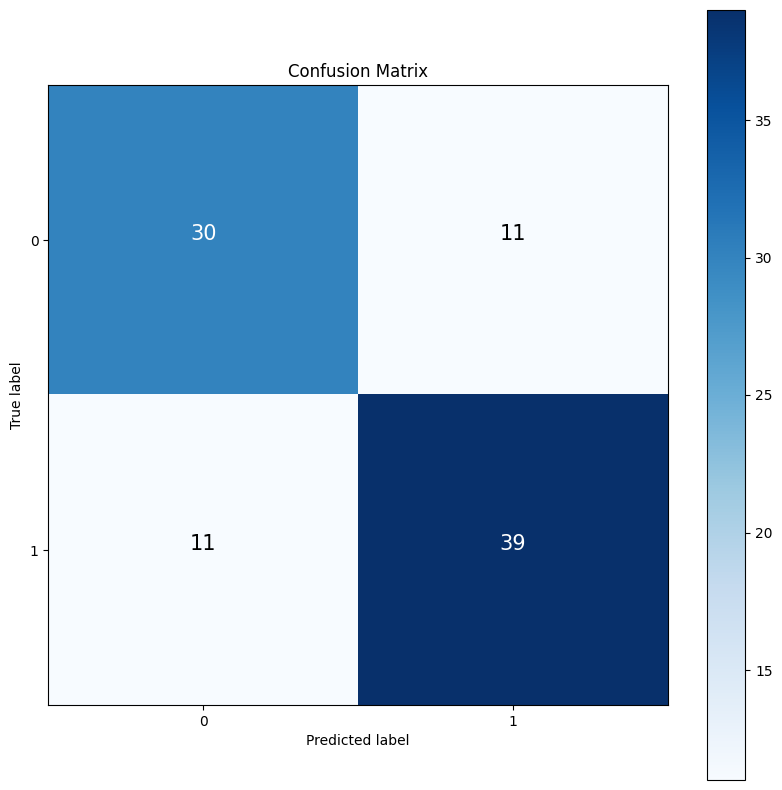

In [61]:
xgb_ress, xgb_name = clasification_result(xgb,'XGBOOST',X_train,X_test,y_train,y_test)

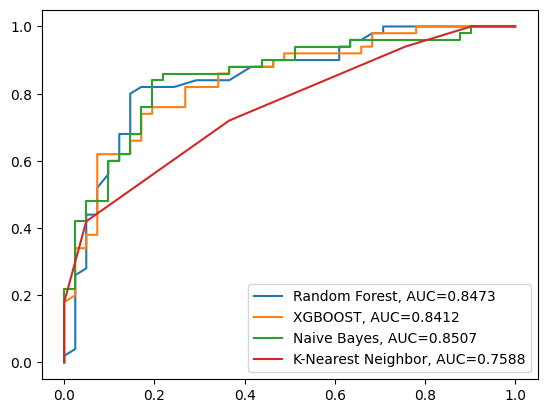

In [62]:
rf_ress['auc'] = get_auc(rf,rf_name,X_test,y_test)
xgb_ress['auc'] = get_auc(xgb,xgb_name,X_test,y_test)
nb_ress['auc'] = get_auc(nb,nb_name,X_test,y_test)
knn_ress['auc'] = get_auc(knn,knn_name,X_test,y_test)

In [63]:
acc = pd.DataFrame([rf_ress,xgb_ress,nb_ress,knn_ress]
             ,index=[rf_name,xgb_name,nb_name,knn_name])
acc.sort_values(by='accuracy',ascending=False)

,accuracy,precision,recall,f1,auc
Random Forest,0.824176,0.825571,0.824176,0.824475,0.8473
Naive Bayes,0.780220,0.787967,0.780220,0.780698,0.8507
XGBOOST,0.758242,0.758242,0.758242,0.758242,0.8412
K-Nearest Neighbor,0.681319,0.680705,0.681319,0.680929,0.7588


### Hyperparameter Tuning


### Naive Bayes RandomizedSearchCV

In [64]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100),
    'priors': [None, [0.25, 0.75], [0.5, 0.5]]
}
nbrs  = GaussianNB()

In [65]:
nb_rs = RandomizedSearchCV(nbrs, param_grid, cv= 5,verbose=2)
nb_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END priors=[0.25, 0.75], var_smoothing=1.873817422860383e-08; total time=   0.0s
[CV] END priors=[0.25, 0.75], var_smoothing=1.873817422860383e-08; total time=   0.0s
[CV] END priors=[0.25, 0.75], var_smoothing=1.873817422860383e-08; total time=   0.0s
[CV] END priors=[0.25, 0.75], var_smoothing=1.873817422860383e-08; total time=   0.0s
[CV] END priors=[0.25, 0.75], var_smoothing=1.873817422860383e-08; total time=   0.0s
[CV] END priors=[0.25, 0.75], var_smoothing=0.01519911082952933; total time=   0.0s
[CV] END priors=[0.25, 0.75], var_smoothing=0.01519911082952933; total time=   0.0s
[CV] END priors=[0.25, 0.75], var_smoothing=0.01519911082952933; total time=   0.0s
[CV] END priors=[0.25, 0.75], var_smoothing=0.01519911082952933; total time=   0.0s
[CV] END priors=[0.25, 0.75], var_smoothing=0.01519911082952933; total time=   0.0s
[CV] END .....priors=None, var_smoothing=0.01873817422860384; total time=   0.0s
[CV] END

RandomizedSearchCV(cv=5, estimator=GaussianNB(),
                   param_distributions={'priors': [None, [0.25, 0.75],
                                                   [0.5, 0.5]],
                                        'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   verbose=2)

In [66]:
nb_rs.best_params_

{'var_smoothing': 1.232846739442066e-07, 'priors': [0.5, 0.5]}

              precision    recall  f1-score   support

           0       0.72      0.83      0.77        41
           1       0.84      0.74      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



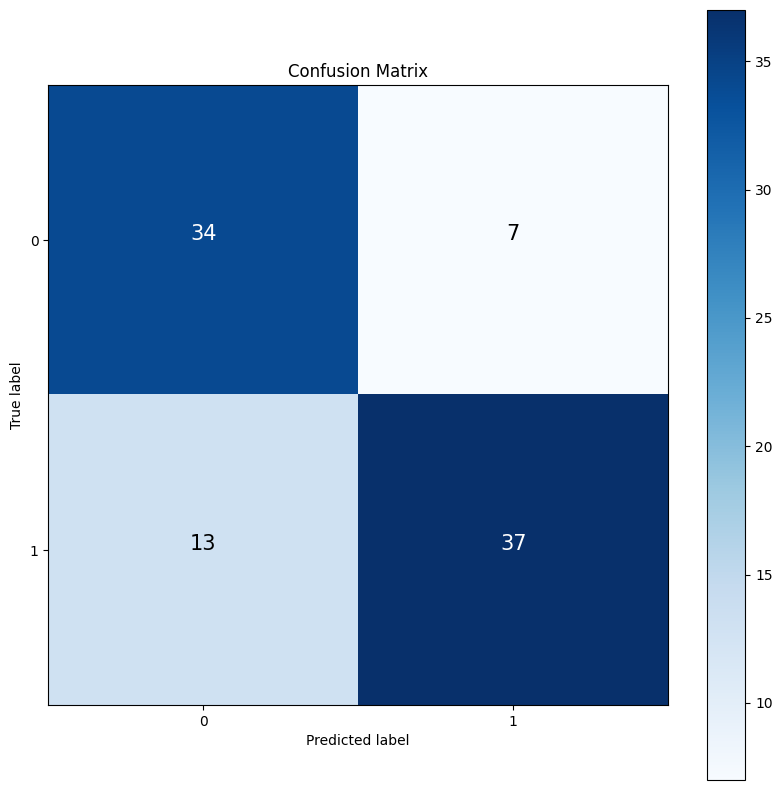

In [67]:
best_params = {'var_smoothing': 3.5111917342151277e-07, 'priors': None}

nb_rs = GaussianNB(**best_params)
nb_rs_ress, nb_rs_name = clasification_result(nb_rs,'Naive Bayes RSCV',X_train,X_test,y_train,y_test)

### RandomizedSearchCV Random Forest

In [68]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf' : [3,4]
}
rs_rf = RandomForestClassifier()

In [69]:
rscv_rf = RandomizedSearchCV(rs_rf, param_grid, cv= 5,verbose=2)
rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, ma

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 7, 8],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [3, 4],
                                        'n_estimators': [100, 200]},
                   verbose=2)

In [70]:
rscv_rf.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 7,
 'criterion': 'entropy'}

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.85      0.82      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



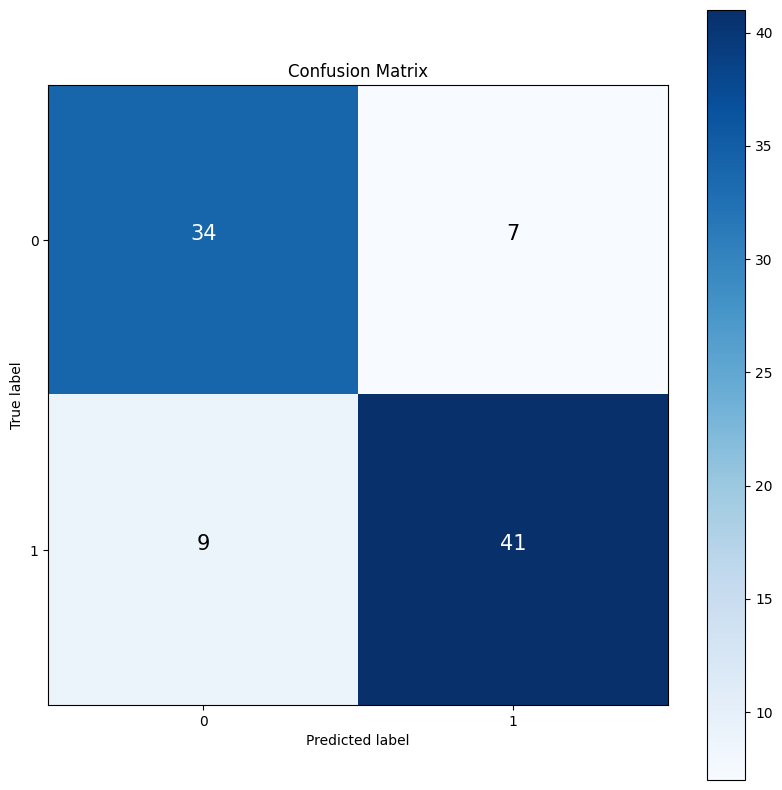

In [71]:
best_params = {'n_estimators': 200,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'gini'}

rf_rs = RandomForestClassifier(**best_params)
rf_rs_ress, rf_rs_name = clasification_result(rf_rs,'Random Forest RSCV',X_train,X_test,y_train,y_test)

### GridSearchCV Random Forest

In [72]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf' : [3,4]
}
rfgs = RandomForestClassifier()

In [73]:
rf_gs = GridSearchCV(rfgs, param_grid, cv= 5,verbose=2)
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, m

[CV] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimator

[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_

[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_

[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, n_estimators=200; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, n_estimators=200; total time=   0.2s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4],
                         'n_estimators': [100, 200]},
             verbose=2)

In [74]:
rf_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'n_estimators': 200}

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



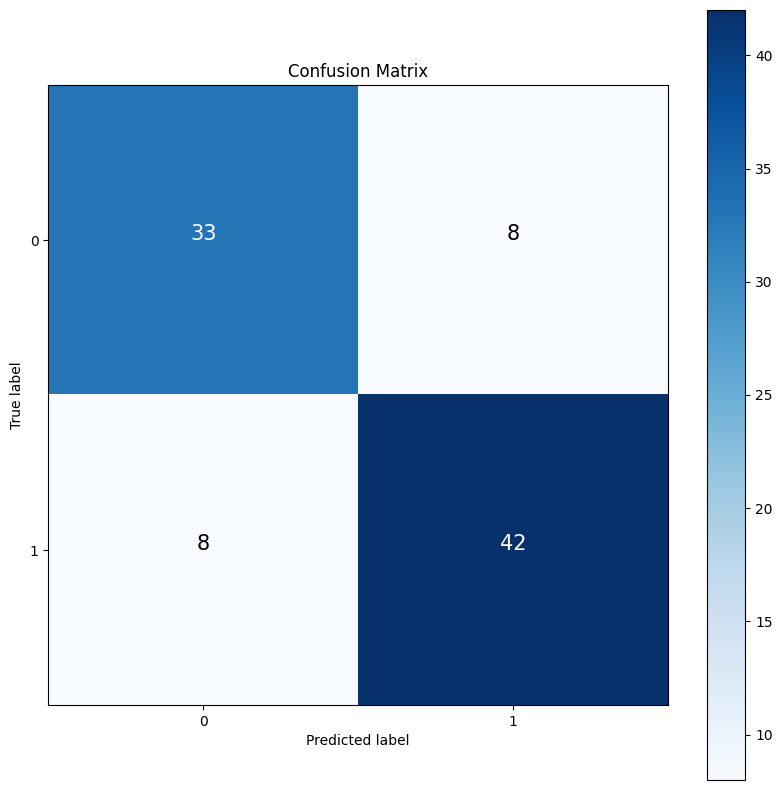

In [75]:
best_params = {'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'n_estimators': 100}
rf_gs = RandomForestClassifier(**best_params)
rf_gs_ress, rf_gs_name = clasification_result(rf_gs,'Random Forest GSCV',X_train,X_test,y_train,y_test)

### GridSearchCV XGBOOST

In [76]:
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [3, 5, 7],
              'min_child_weight': [1, 3, 5],
              'gamma': [0.0, 0.1, 0.2]}
xgbgs = XGBClassifier()

In [77]:
xgb_gs = GridSearchCV(xgbgs, param_grid, cv= 5,verbose=2)
xgb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.0, learning

[CV] END gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight

[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5; total t

[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5; total time=   0.0s

[CV] END gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'min_child_weight': [1, 3, 5]},
             verbose=2)

In [78]:
xgb_gs.best_params_

{'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3}

              precision    recall  f1-score   support

           0       0.75      0.80      0.78        41
           1       0.83      0.78      0.80        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



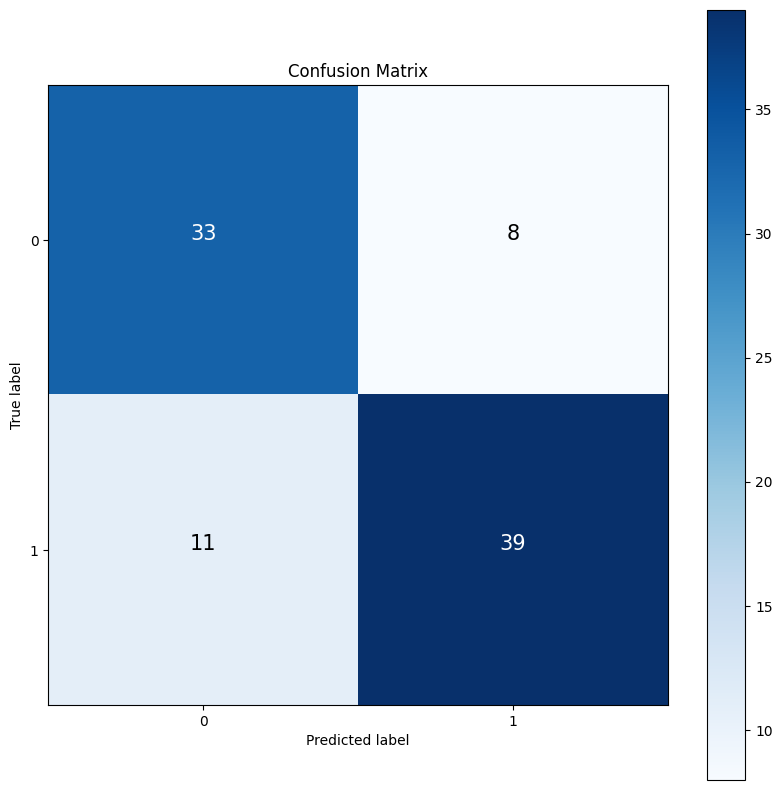

In [79]:
best_params = {'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5}
xgb_gs = XGBClassifier(**best_params)
xgb_gs_ress, xgb_gs_name = clasification_result(xgb_gs,'XGBOOST GSCV',X_train,X_test,y_train,y_test)

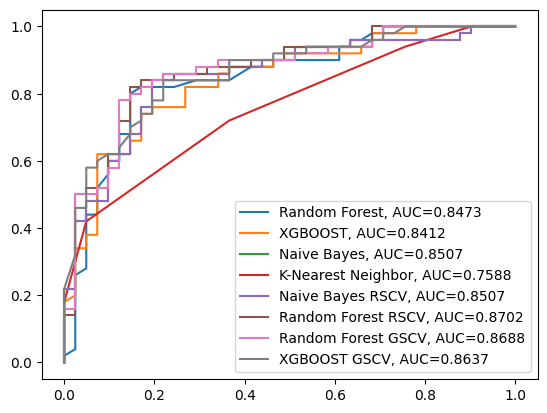

In [80]:
rf_ress['auc'] = get_auc(rf,rf_name,X_test,y_test)
xgb_ress['auc'] = get_auc(xgb,xgb_name,X_test,y_test)
nb_ress['auc'] = get_auc(nb,nb_name,X_test,y_test)
knn_ress['auc'] = get_auc(knn,knn_name,X_test,y_test)
nb_rs_ress['auc'] = get_auc(nb_rs,nb_rs_name,X_test,y_test)
rf_rs_ress['auc'] = get_auc(rf_rs,rf_rs_name,X_test,y_test)
rf_gs_ress['auc'] = get_auc(rf_gs,rf_gs_name,X_test,y_test)
xgb_gs_ress['auc'] = get_auc(xgb_gs,xgb_gs_name,X_test,y_test)

In [81]:
class_pluss = pd.DataFrame([rf_rs_ress,xgb_gs_ress,nb_rs_ress,rf_gs_ress],
                    index=[rf_rs_name,xgb_gs_name,nb_rs_name,rf_gs_name])
class_pluss

,accuracy,precision,recall,f1,auc
Random Forest RSCV,0.824176,0.825571,0.824176,0.824475,0.8702
XGBOOST GSCV,0.791209,0.793839,0.791209,0.791665,0.8637
Naive Bayes RSCV,0.780220,0.787967,0.780220,0.780698,0.8507
Random Forest GSCV,0.824176,0.824176,0.824176,0.824176,0.8688


In [82]:
new_ress = pd.concat([acc,class_pluss]).sort_values(by='accuracy',ascending=False)
new_ress

,accuracy,precision,recall,f1,auc
Random Forest,0.824176,0.825571,0.824176,0.824475,0.8473
Random Forest RSCV,0.824176,0.825571,0.824176,0.824475,0.8702
Random Forest GSCV,0.824176,0.824176,0.824176,0.824176,0.8688
XGBOOST GSCV,0.791209,0.793839,0.791209,0.791665,0.8637
Naive Bayes,0.780220,0.787967,0.780220,0.780698,0.8507
Naive Bayes RSCV,0.780220,0.787967,0.780220,0.780698,0.8507
XGBOOST,0.758242,0.758242,0.758242,0.758242,0.8412
K-Nearest Neighbor,0.681319,0.680705,0.681319,0.680929,0.7588


### Feature Importance Menggunakan SHAP

In [83]:
# masukan model kedalam explainer 
explainer = shap.Explainer(rf_gs.predict, X_test)
# menghitung SHAP Value
shap_values = explainer(X_test)

Exact explainer: 92it [00:10,  1.49s/it]                                                                               


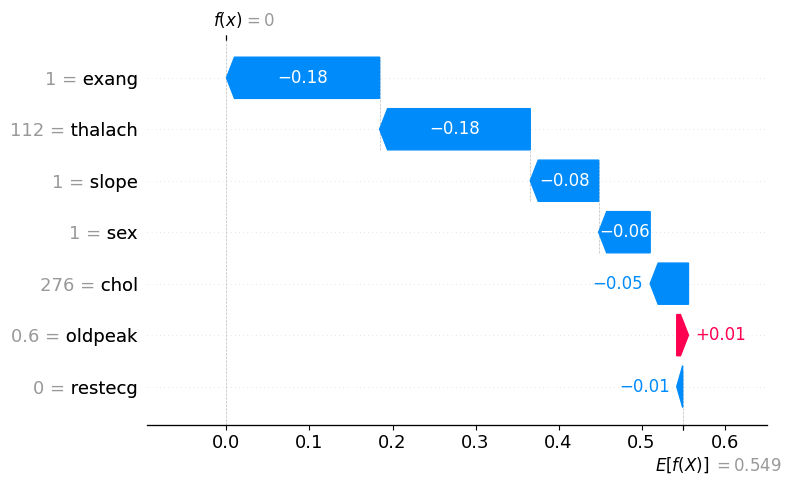

In [84]:
shap.plots.waterfall(shap_values[0])

### Best Model
model terbaik yang didapatkan adalah Random Forest melalui tuning
Grid Search CV dengan parameter: {'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'n_estimators': 100}. Hasil tuning
menggunakan Grid Search CV dari Random Forest lebih konsisten
memiliki akurasi pada precision, recall serta auc test score yang lebih tinggi
jika dibandingkan dengan model lain. Kami juga
menyarankan agar menggunakan model ini untuk keperluan
bisnis, menilai dari konsistensi serta model ini juga yang
dapat memprediksi penyakit jantung lebih baik dibandingkan model lain.

### Business Problem
Berdasarkan hasil pada feature importance dari model terbaik yaitu Random Forest, exang dan thalach menjadi fitur yang paling berpengaruh dalam memprediksi penyakit jantung, oleh sebab itu pasien perlu memperhatikan dan mencari solusi agar tidak memiliki exang (memiliki induksi angina pectoris), Angina pectoris adalah kondisi yang disebabkan oleh penyempitan atau penyumbatan arteri koroner yang mengurangi pasokan darah ke otot jantung, serta mencari solusi untuk menjaga thalach (Detak jantung maksimal tercapai) tetap dalam angka normal, salah satu contohnya adalah dengan melatih jantung serta menerapkan hidup sehat.

### Prediksi machine learning tanpa seleksi fitur

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


### Modelling

In [87]:
# naive bayes
nb = GaussianNB()

# KNN
knn = KNeighborsClassifier()

# Random Forest
rf = RandomForestClassifier()

# xgboost
xgb = XGBClassifier()

### Naive Bayes

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



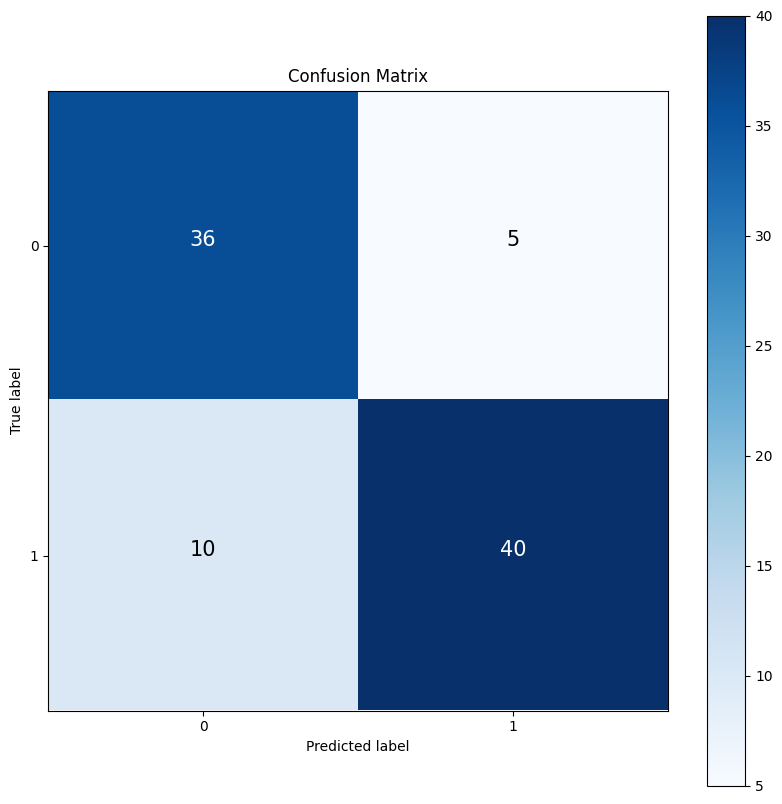

In [88]:
nb_ress,nb_name = clasification_result(nb,'Naive Bayes',X_train,X_test,y_train,y_test)

### KNN

              precision    recall  f1-score   support

           0       0.63      0.59      0.61        41
           1       0.68      0.72      0.70        50

    accuracy                           0.66        91
   macro avg       0.66      0.65      0.65        91
weighted avg       0.66      0.66      0.66        91



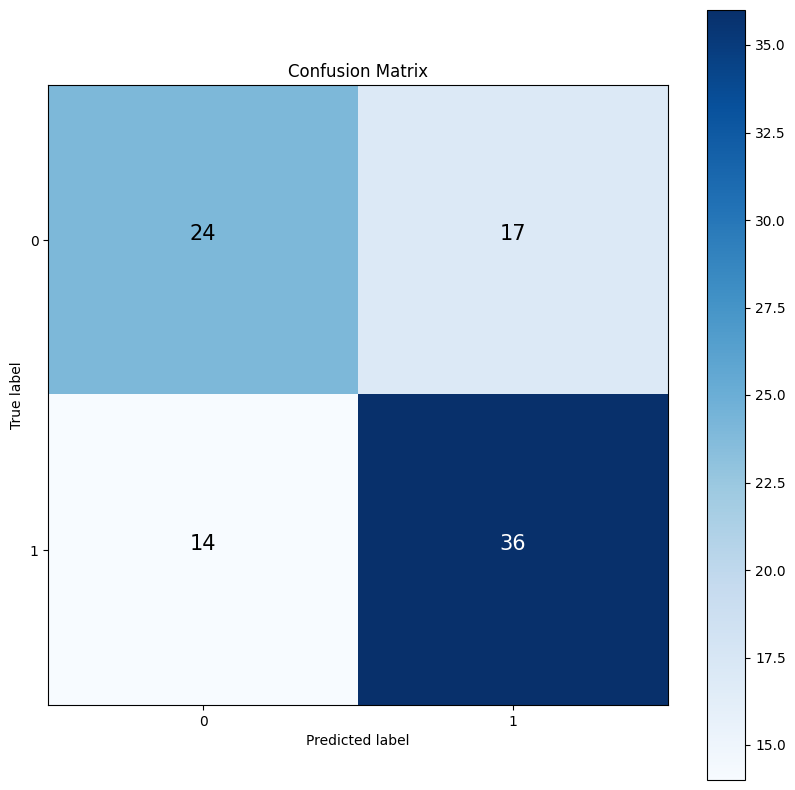

In [89]:
knn_ress, knn_name =clasification_result(knn,'K-Nearest Neighbor',X_train,X_test,y_train,y_test)

### Random Forest

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



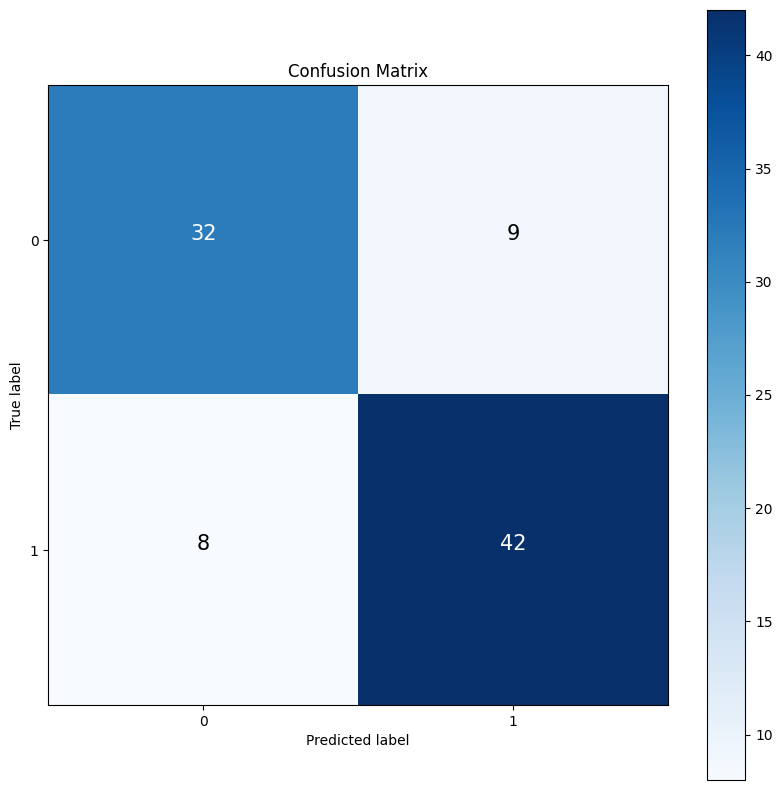

In [90]:
rf_ress, rf_name = clasification_result(rf,'Random Forest',X_train,X_test,y_train,y_test)

### XGBOOST

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.83      0.80      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



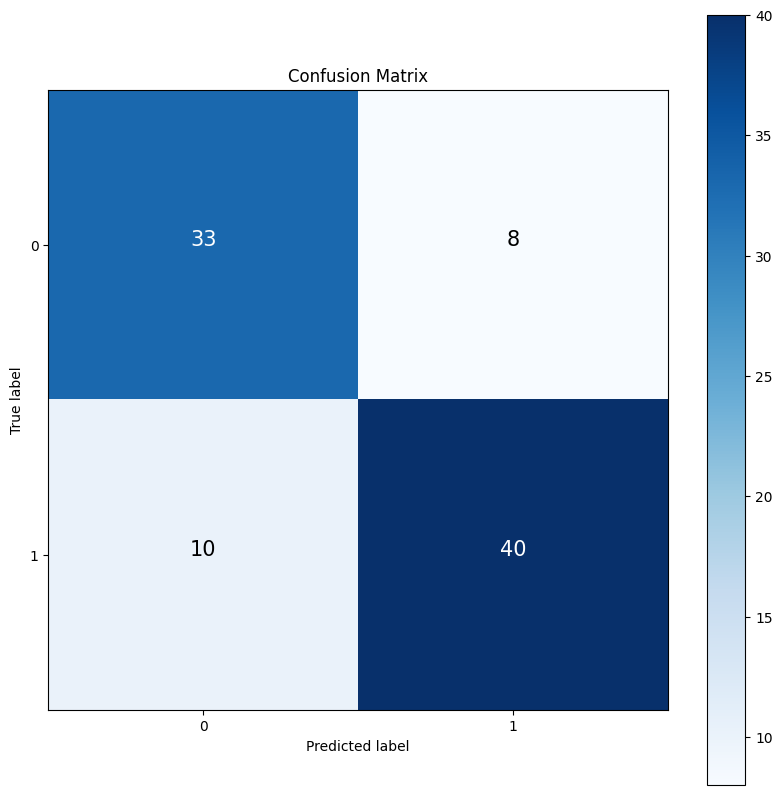

In [91]:
xgb_ress, xgb_name = clasification_result(xgb,'XGBOOST',X_train,X_test,y_train,y_test)

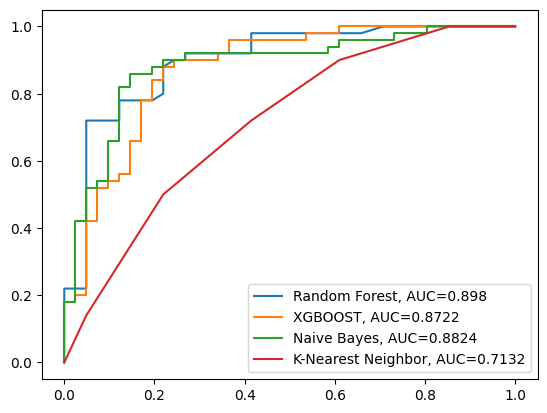

In [92]:
rf_ress['auc'] = get_auc(rf,rf_name,X_test,y_test)
xgb_ress['auc'] = get_auc(xgb,xgb_name,X_test,y_test)
nb_ress['auc'] = get_auc(nb,nb_name,X_test,y_test)
knn_ress['auc'] = get_auc(knn,knn_name,X_test,y_test)

In [93]:
acc = pd.DataFrame([rf_ress,xgb_ress,nb_ress,knn_ress]
             ,index=[rf_name,xgb_name,nb_name,knn_name])
acc.sort_values(by='accuracy',ascending=False)

,accuracy,precision,recall,f1,auc
Naive Bayes,0.835165,0.841004,0.835165,0.835564,0.8824
Random Forest,0.813187,0.812928,0.813187,0.812958,0.8980
XGBOOST,0.802198,0.803646,0.802198,0.802534,0.8722
K-Nearest Neighbor,0.659341,0.657769,0.659341,0.657834,0.7132


### Feature Importance Menggunakan SHAP

In [94]:
# masukan model kedalam explainer 
explainer = shap.Explainer(nb.predict, X_test)
# menghitung SHAP Value
shap_values = explainer(X_test)

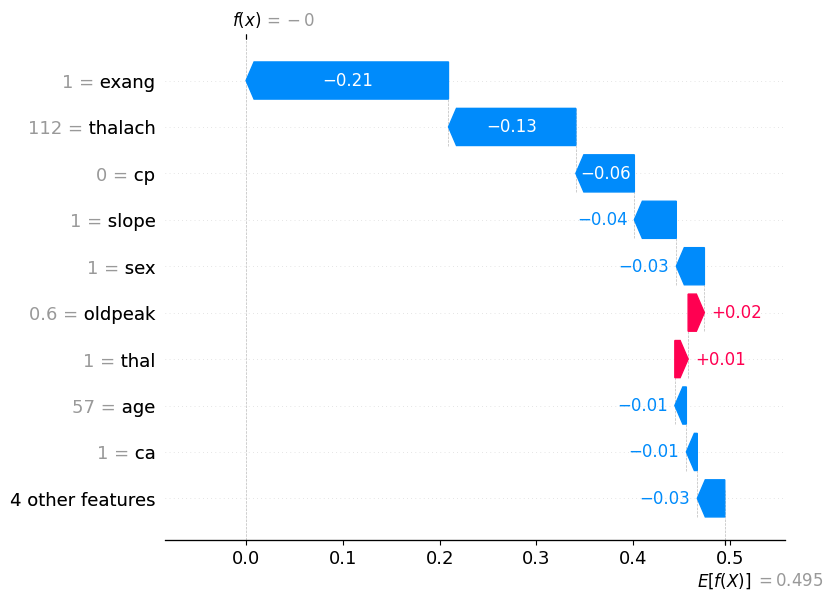

In [95]:
shap.plots.waterfall(shap_values[0])

### Prediksi machine learning tanpa seleksi fitur dengan normalisasi

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [127]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
X_train_scaled

array([[-1.67339636, -1.39443338,  0.95280942, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-2.76362385,  0.71713717, -0.01367669, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-0.47414611, -1.39443338,  0.95280942, ..., -0.67796691,
        -0.67629057, -0.54888242],
       ...,
       [ 1.59728613,  0.71713717,  1.91929553, ..., -0.67796691,
         0.37792709, -0.54888242],
       [-0.91023711,  0.71713717, -0.9801628 , ...,  0.955317  ,
        -0.67629057,  1.13753893],
       [ 0.94314964, -1.39443338, -0.01367669, ...,  0.955317  ,
         1.43214475, -0.54888242]])

In [ ]:
# naive bayes
nb = GaussianNB()

# KNN
knn = KNeighborsClassifier()

# Random Forest
rf = RandomForestClassifier()

# xgboost
xgb = XGBClassifier()

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

              preci

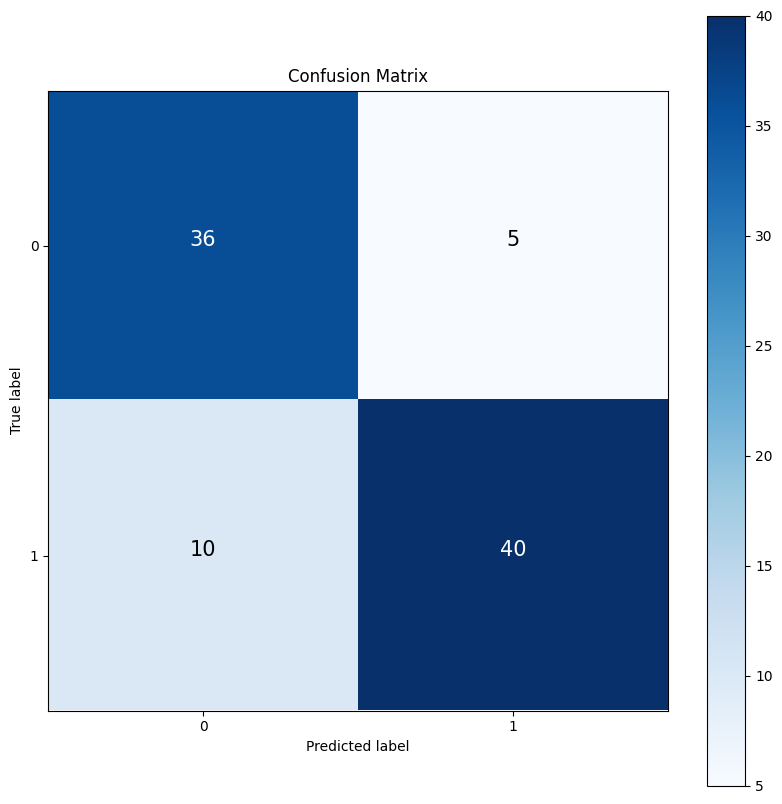

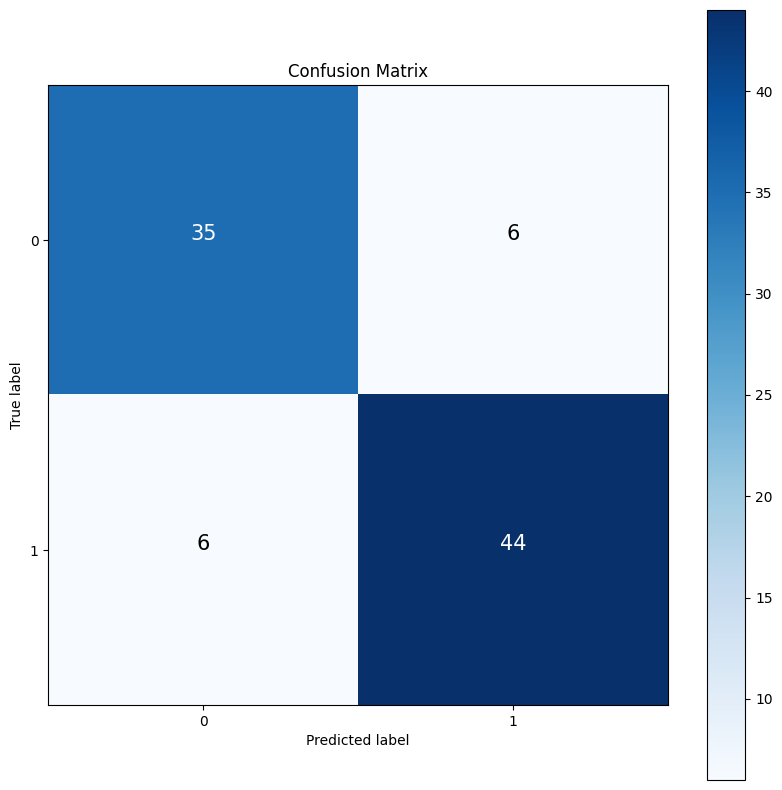

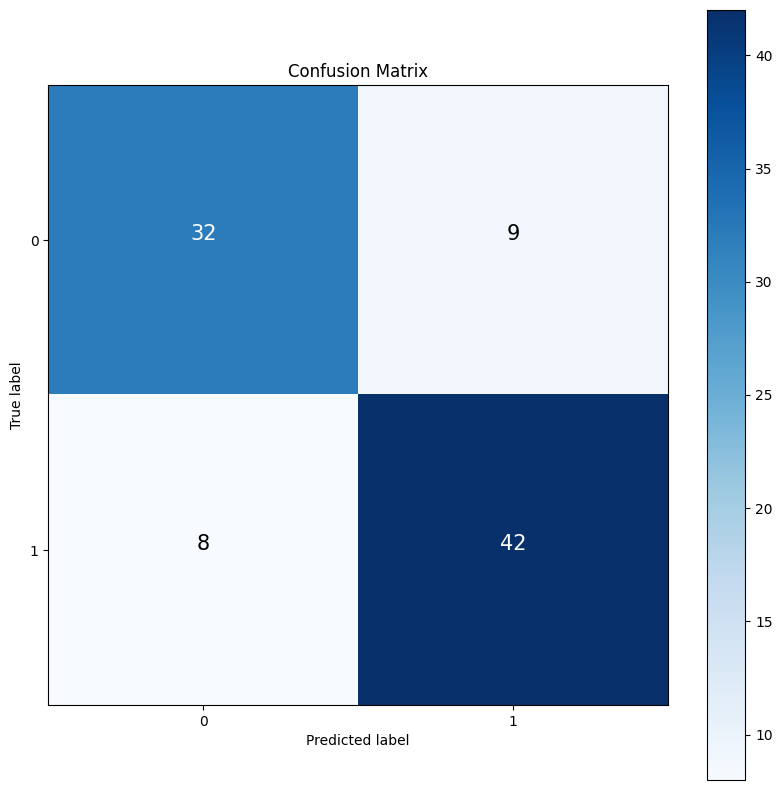

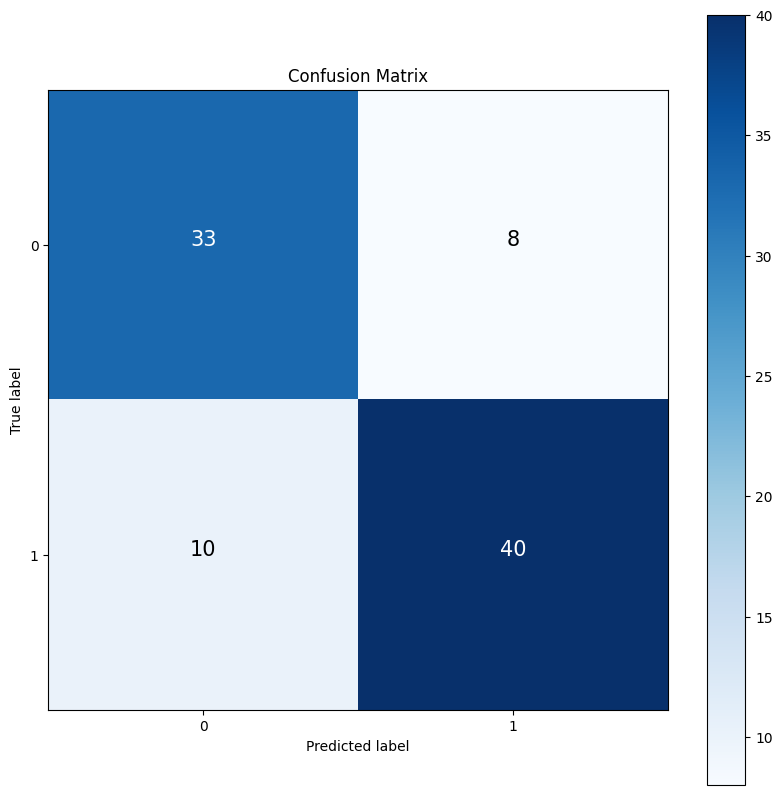

In [103]:
nb_ress,nb_name = clasification_result(nb,'Naive Bayes',X_train_scaled,X_test_scaled,y_train,y_test)
knn_ress, knn_name =clasification_result(knn,'K-Nearest Neighbor',X_train_scaled,X_test_scaled,y_train,y_test)
rf_ress, rf_name = clasification_result(rf,'Random Forest',X_train_scaled,X_test_scaled,y_train,y_test)
xgb_ress, xgb_name = clasification_result(xgb,'XGBOOST',X_train_scaled,X_test_scaled,y_train,y_test)

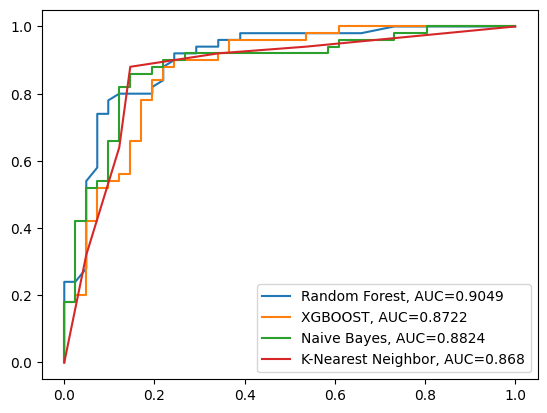

In [104]:
rf_ress['auc'] = get_auc(rf,rf_name,X_test_scaled,y_test)
xgb_ress['auc'] = get_auc(xgb,xgb_name,X_test_scaled,y_test)
nb_ress['auc'] = get_auc(nb,nb_name,X_test_scaled,y_test)
knn_ress['auc'] = get_auc(knn,knn_name,X_test_scaled,y_test)

In [105]:
acc = pd.DataFrame([rf_ress,xgb_ress,nb_ress,knn_ress]
             ,index=[rf_name,xgb_name,nb_name,knn_name])
acc.sort_values(by='accuracy',ascending=False)

,accuracy,precision,recall,f1,auc
K-Nearest Neighbor,0.868132,0.868132,0.868132,0.868132,0.8680
Naive Bayes,0.835165,0.841004,0.835165,0.835564,0.8824
Random Forest,0.813187,0.812928,0.813187,0.812958,0.9049
XGBOOST,0.802198,0.803646,0.802198,0.802534,0.8722
